In [1]:
import pandas as pd
import numpy as np

In [2]:
adm=pd.read_excel(r'/Users/marianafaria/Desktop/ICDM_2010_2021 (1.2)/ICDM_2010_2021/Fonte/urg_altas_1.xlsx')

In [3]:
adm

,URG_EPISODIO,NUM_MECANOGRAFICO,COD_LOCAL,DTA_ADMISSAO,HORA_ADMISSAO,COD_CAUSA,COD_PROVENIENCIA,COD_UNIDADE_PROV,COD_SUBSISTEMA_RESP,COD_PRIORIDADE,COD_SALA,COD_VIA_VERDE,DTA_TRIAGEM,DTA_NASCIMENTO,SEXO,COD_DESTINO,DTA_ALTA,HORA_ALTA,COD_CONCELHO,DESIGNACAO
0,22082630,6978,1,2022-05-25,9246,5.0,5.0,NaN,935640,3.0,704.0,NaN,2022-05-25 02:45:09,1976-06-29,2,18.0,2022-05-25,28800.0,11,PENAFIEL
1,22052092,9087,4,2022-04-04,54203,6.0,5.0,NaN,935601,NaN,740.0,NaN,NaN,1986-03-06,2,18.0,2022-04-04,61500.0,13,O. AZEMEIS
2,21120090,6978,1,2021-09-13,53903,5.0,5.0,NaN,935601,3.0,704.0,NaN,2021-09-13 15:01:45,1963-01-21,1,18.0,2021-09-14,720.0,6,S MARTINHO DE SARDOURA
3,22093655,8197,1,2022-06-13,26696,5.0,5.0,NaN,935601,3.0,704.0,NaN,2022-06-13 07:33:02,1963-01-21,1,18.0,2022-06-13,60000.0,6,S MARTINHO DE SARDOURA
4,22125631,5715,1,2022-08-10,49164,5.0,33.0,NaN,990001,3.0,704.0,NaN,2022-08-10 13:48:54,1972-04-08,1,5.0,2022-08-10,74820.0,5,TORNO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348684,22167378,8240,1,2022-10-26,50086,5.0,5.0,NaN,935601,4.0,703.0,NaN,2022-10-26 14:05:21,1998-11-02,2,5.0,2022-10-26,52320.0,5,CERNADELO E LOUSADA (S?O MIGUE
348685,22167382,9116,3,2022-10-26,50423,5.0,5.0,NaN,935601,3.0,732.0,NaN,2022-10-26 14:14:16,2020-11-10,1,NaN,NaN,NaN,3,MARGARIDE
348686,22167388,20,3,2022-10-26,50987,5.0,5.0,NaN,935601,3.0,732.0,NaN,2022-10-26 14:11:33,2022-08-17,2,NaN,NaN,NaN,11,PENAFIEL
348687,22167434,8297,9,2022-10-26,53801,5.0,5.0,NaN,935640,2.0,824.0,2.0,2022-10-26 15:15:53,1967-01-05,2,NaN,NaN,NaN,5,MONDIM DE BASTO


In [4]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348689 entries, 0 to 348688
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   URG_EPISODIO         348689 non-null  int64  
 1   NUM_MECANOGRAFICO    348689 non-null  int64  
 2   COD_LOCAL            348689 non-null  int64  
 3   DTA_ADMISSAO         348689 non-null  object 
 4   HORA_ADMISSAO        348689 non-null  int64  
 5   COD_CAUSA            348672 non-null  float64
 6   COD_PROVENIENCIA     348555 non-null  float64
 7   COD_UNIDADE_PROV     38107 non-null   float64
 8   COD_SUBSISTEMA_RESP  348689 non-null  int64  
 9   COD_PRIORIDADE       322830 non-null  float64
 10  COD_SALA             347945 non-null  float64
 11  COD_VIA_VERDE        7856 non-null    float64
 12  DTA_TRIAGEM          322952 non-null  object 
 13  DTA_NASCIMENTO       348689 non-null  object 
 14  SEXO                 348689 non-null  int64  
 15  COD_DESTINO      

In [5]:
amarelos=adm[(adm['COD_PRIORIDADE']==3)&(adm['COD_LOCAL']==1)]

In [6]:
amarelos['URG_EPISODIO'].nunique()

107742

In [7]:
amarelos=amarelos[['URG_EPISODIO','DTA_ADMISSAO']]

In [8]:
amarelos["DTA_ADMISSAO"]=pd.to_datetime(amarelos["DTA_ADMISSAO"])

In [9]:
amarelos=amarelos.groupby('DTA_ADMISSAO')['URG_EPISODIO'].count().reset_index()

In [10]:
amarelos

,DTA_ADMISSAO,URG_EPISODIO
0,2021-01-01,108
1,2021-01-02,140
2,2021-01-03,116
3,2021-01-04,167
4,2021-01-05,141
...,...,...
659,2022-10-22,162
660,2022-10-23,171
661,2022-10-24,203
662,2022-10-25,166


In [11]:
amarelos=amarelos.sort_values("DTA_ADMISSAO")

In [12]:
amarelos["DTA_ADMISSAO"]=amarelos["DTA_ADMISSAO"].astype(str)

In [13]:
amarelos['Ano']=amarelos['DTA_ADMISSAO'].apply(lambda x: x.split('-')[0])

In [14]:
amarelos['Mes']=amarelos['DTA_ADMISSAO'].apply(lambda x: x.split('-')[1])

In [15]:
amarelos['Mes']=amarelos['Mes'].astype(int)

In [16]:
amarelos_adm=amarelos[((amarelos['Ano']=='2021')&(amarelos['Mes']>8))|((amarelos['Ano']=='2022')&(amarelos['Mes']<9))]

In [17]:
amarelos_adm["DTA_ADMISSAO"]=pd.to_datetime(amarelos_adm["DTA_ADMISSAO"])

<ipython-input-17-ff085db6540d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amarelos_adm["DTA_ADMISSAO"]=pd.to_datetime(amarelos_adm["DTA_ADMISSAO"])


In [18]:
amarelos_adm=amarelos_adm[['DTA_ADMISSAO','URG_EPISODIO']]

In [20]:
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

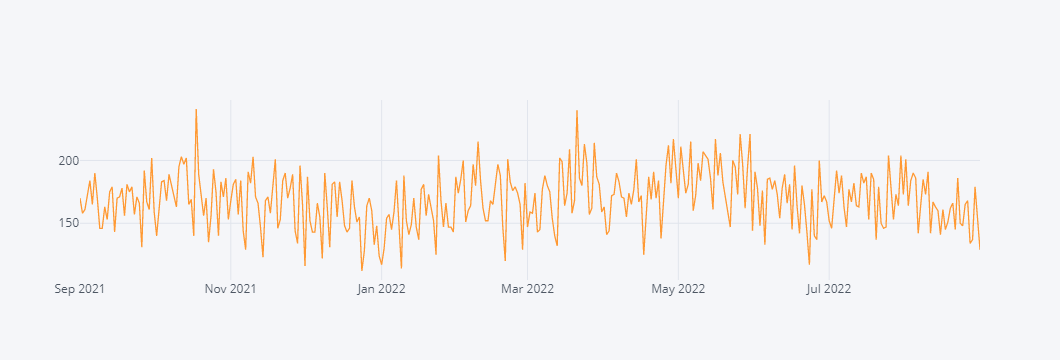

In [21]:
amarelos_adm.iplot(kind='scatter', x='DTA_ADMISSAO', y='URG_EPISODIO')

In [22]:
ts=amarelos_adm['URG_EPISODIO']
### Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='M'):
   # '''
    #Input: 
     #   ts : your time series data
      #  pdq : ARIMA combinations from above
       # pdqs : seasonal ARIMA combinations from above
       # maxiter : number of iterations, increase if your model isn't converging
       # frequency : default='M' for month. Change to suit your time series frequency
        #    e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    #Return:
     #   Prints out top 5 parameter combinations
      #  Returns dataframe of parameter combinations ranked by BIC
    #'''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                order=comb,
                                                seasonal_order=combs)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}7 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(ts, pdq, pdqs, freq='M')

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 0, 0, 7)7 : BIC Calculated =4792.623538949753
SARIMAX (0, 0, 0) x (0, 0, 1, 7)7 : BIC Calculated =4384.946364068596


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 0, 2, 7)7 : BIC Calculated =4126.5572469352
SARIMAX (0, 0, 0) x (0, 1, 0, 7)7 : BIC Calculated =3274.6146523938005


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 1, 1, 7)7 : BIC Calculated =3156.3803549325557


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 1, 2, 7)7 : BIC Calculated =3154.4674673817676
SARIMAX (0, 0, 0) x (0, 2, 0, 7)7 : BIC Calculated =3580.3239204901124


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



SARIMAX (0, 0, 0) x (0, 2, 1, 7)7 : BIC Calculated =3250.7357239465045


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 2, 2, 7)7 : BIC Calculated =3153.0239944424607
SARIMAX (0, 0, 0) x (1, 0, 0, 7)7 : BIC Calculated =3370.0624951396653
SARIMAX (0, 0, 0) x (1, 0, 1, 7)7 : BIC Calculated =3253.745957698586


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anacon

SARIMAX (0, 0, 0) x (1, 0, 2, 7)7 : BIC Calculated =3252.0329445166453
SARIMAX (0, 0, 0) x (1, 1, 0, 7)7 : BIC Calculated =3213.1243912174914


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 1, 1, 7)7 : BIC Calculated =3150.3164630334227


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 1, 2, 7)7 : BIC Calculated =3152.840941082893
SARIMAX (0, 0, 0) x (1, 2, 0, 7)7 : BIC Calculated =3410.3170720837143


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 2, 1, 7)7 : BIC Calculated =3195.1198575826543


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 2, 2, 7)7 : BIC Calculated =3154.324038519341
SARIMAX (0, 0, 0) x (2, 0, 0, 7)7 : BIC Calculated =3309.5057555884337


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 0, 1, 7)7 : BIC Calculated =3248.1364759949984


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 0, 2, 7)7 : BIC Calculated =3252.1790851417827
SARIMAX (0, 0, 0) x (2, 1, 0, 7)7 : BIC Calculated =3193.4288314888513


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 1, 1, 7)7 : BIC Calculated =3153.2996522379867


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 1, 2, 7)7 : BIC Calculated =3162.0526519283026


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 2, 0, 7)7 : BIC Calculated =3317.8080383257834


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 2, 1, 7)7 : BIC Calculated =3179.001057788228


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 0) x (2, 2, 2, 7)7 : BIC Calculated =3159.960792096659
SARIMAX (0, 0, 1) x (0, 0, 0, 7)7 : BIC Calculated =4378.3937909188235


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 0, 1, 7)7 : BIC Calculated =4112.718659660386


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 0, 2, 7)7 : BIC Calculated =3945.7685115073346
SARIMAX (0, 0, 1) x (0, 1, 0, 7)7 : BIC Calculated =3278.203991213229


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 1, 1, 7)7 : BIC Calculated =3149.6031178451776


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 1, 2, 7)7 : BIC Calculated =3146.5380727226006
SARIMAX (0, 0, 1) x (0, 2, 0, 7)7 : BIC Calculated =3584.7531601860073


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 2, 1, 7)7 : BIC Calculated =3254.3652188876536


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 2, 2, 7)7 : BIC Calculated =3149.394488995751


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 0, 0, 7)7 : BIC Calculated =3372.2245324186183


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 0, 1, 7)7 : BIC Calculated =3244.5683246803314


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/p

SARIMAX (0, 0, 1) x (1, 0, 2, 7)7 : BIC Calculated =3241.69856789574
SARIMAX (0, 0, 1) x (1, 1, 0, 7)7 : BIC Calculated =3215.269517024198
SARIMAX (0, 0, 1) x (1, 1, 1, 7)7 : BIC Calculated =3144.2054371881336


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 1, 2, 7)7 : BIC Calculated =3148.3003393275944
SARIMAX (0, 0, 1) x (1, 2, 0, 7)7 : BIC Calculated =3414.1811725462862


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 2, 1, 7)7 : BIC Calculated =3197.375013429721


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 2, 2, 7)7 : BIC Calculated =3150.976532204612


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 0, 0, 7)7 : BIC Calculated =23.599589414329966


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 0, 1, 7)7 : BIC Calculated =3241.3338190457443


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 0, 2, 7)7 : BIC Calculated =3257.8372480833123
SARIMAX (0, 0, 1) x (2, 1, 0, 7)7 : BIC Calculated =3193.8567001101596


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 1, 1, 7)7 : BIC Calculated =3148.4872499882763


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 1, 2, 7)7 : BIC Calculated =3155.946476288204


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 2, 0, 7)7 : BIC Calculated =3320.5613767509444


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 2, 1, 7)7 : BIC Calculated =3179.698609778795


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (2, 2, 2, 7)7 : BIC Calculated =3156.7207779136766


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 0, 0, 7)7 : BIC Calculated =4139.282057402111


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 0, 1, 7)7 : BIC Calculated =3957.0718552591957


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 0, 2, 7)7 : BIC Calculated =3867.8271013723106
SARIMAX (0, 0, 2) x (0, 1, 0, 7)7 : BIC Calculated =3282.7769889720917


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 1, 1, 7)7 : BIC Calculated =3153.7654992883176


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 1, 2, 7)7 : BIC Calculated =3149.7120602626296
SARIMAX (0, 0, 2) x (0, 2, 0, 7)7 : BIC Calculated =3588.3830287404685


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 2, 1, 7)7 : BIC Calculated =3258.9257236228427


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 2, 2, 7)7 : BIC Calculated =3154.064433461217


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 0, 0, 7)7 : BIC Calculated =3375.94438690845


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 0, 1, 7)7 : BIC Calculated =3248.1270759380395


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 0, 2, 7)7 : BIC Calculated =3244.3942671803425
SARIMAX (0, 0, 2) x (1, 1, 0, 7)7 : BIC Calculated =3220.6522394204435


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 1, 1, 7)7 : BIC Calculated =3147.6752775862055


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 1, 2, 7)7 : BIC Calculated =3152.29693060601


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 2, 0, 7)7 : BIC Calculated =3419.393443641989


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 2, 1, 7)7 : BIC Calculated =3202.723676425816


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 2, 2, 7)7 : BIC Calculated =3155.2608956358818


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 0, 0, 7)7 : BIC Calculated =3806.934587635416


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 0, 1, 7)7 : BIC Calculated =3663.367370298922


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 0, 2, 7)7 : BIC Calculated =3265.5323731313706


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 1, 0, 7)7 : BIC Calculated =3199.0988067602852


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 1, 1, 7)7 : BIC Calculated =3152.3903011655025


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 1, 2, 7)7 : BIC Calculated =3159.405997433786


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 2, 0, 7)7 : BIC Calculated =3325.444417830235


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 2, 1, 7)7 : BIC Calculated =3184.9149068161505


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 2, 2, 7)7 : BIC Calculated =3161.0581508464747
SARIMAX (0, 1, 0) x (0, 0, 0, 7)7 : BIC Calculated =3468.928192238557
SARIMAX (0, 1, 0) x (0, 0, 1, 7)7 : BIC Calculated =3434.360562131718


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anacon

SARIMAX (0, 1, 0) x (0, 0, 2, 7)7 : BIC Calculated =3429.287829022273
SARIMAX (0, 1, 0) x (0, 1, 0, 7)7 : BIC Calculated =3481.899459206652


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 1, 1, 7)7 : BIC Calculated =3293.783613945449


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 1, 2, 7)7 : BIC Calculated =3297.7219071472523
SARIMAX (0, 1, 0) x (0, 2, 0, 7)7 : BIC Calculated =3788.5474743113305


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 2, 1, 7)7 : BIC Calculated =3453.8399403540325


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 2, 2, 7)7 : BIC Calculated =3300.9357153697547
SARIMAX (0, 1, 0) x (1, 0, 0, 7)7 : BIC Calculated =3419.023479765843


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 0, 1, 7)7 : BIC Calculated =3358.7937361423856


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 0, 2, 7)7 : BIC Calculated =3362.734175679354
SARIMAX (0, 1, 0) x (1, 1, 0, 7)7 : BIC Calculated =3411.474657054892


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 1, 1, 7)7 : BIC Calculated =3297.8758848231178


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 1, 2, 7)7 : BIC Calculated =3302.423865334046
SARIMAX (0, 1, 0) x (1, 2, 0, 7)7 : BIC Calculated =3615.30583556897


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 2, 1, 7)7 : BIC Calculated =3389.6990156098977


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 2, 2, 7)7 : BIC Calculated =3303.402585316057
SARIMAX (0, 1, 0) x (2, 0, 0, 7)7 : BIC Calculated =3411.8663746890293


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 0, 1, 7)7 : BIC Calculated =3362.8929026608494


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 0, 2, 7)7 : BIC Calculated =3367.4685058636746
SARIMAX (0, 1, 0) x (2, 1, 0, 7)7 : BIC Calculated =3380.728168392456


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 1, 1, 7)7 : BIC Calculated =3303.081777215939


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 1, 2, 7)7 : BIC Calculated =3308.2987355153027


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 2, 0, 7)7 : BIC Calculated =3515.0300046360767


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 2, 1, 7)7 : BIC Calculated =3363.433005329351


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 0) x (2, 2, 2, 7)7 : BIC Calculated =3309.1459162775886
SARIMAX (0, 1, 1) x (0, 0, 0, 7)7 : BIC Calculated =3273.265339167539


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 0, 1, 7)7 : BIC Calculated =3238.918010811862


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 0, 2, 7)7 : BIC Calculated =3232.621995274816
SARIMAX (0, 1, 1) x (0, 1, 0, 7)7 : BIC Calculated =3278.152704501769


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 1, 1, 7)7 : BIC Calculated =3113.878876967202


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 1, 2, 7)7 : BIC Calculated =3117.155276552614
SARIMAX (0, 1, 1) x (0, 2, 0, 7)7 : BIC Calculated =3582.8714034620007


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 2, 1, 7)7 : BIC Calculated =3259.571452462664


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 2, 2, 7)7 : BIC Calculated =3123.9667700046043
SARIMAX (0, 1, 1) x (1, 0, 0, 7)7 : BIC Calculated =3222.684808872655


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 0, 1, 7)7 : BIC Calculated =3173.6938828272177


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 0, 2, 7)7 : BIC Calculated =3177.058950194839
SARIMAX (0, 1, 1) x (1, 1, 0, 7)7 : BIC Calculated =3217.4929683183964


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 1, 1, 7)7 : BIC Calculated =3117.1980202252


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 1, 2, 7)7 : BIC Calculated =3122.5244297008817


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 2, 0, 7)7 : BIC Calculated =3414.332085012142


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 2, 1, 7)7 : BIC Calculated =3204.256513367173


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 2, 2, 7)7 : BIC Calculated =3126.7408891183613


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 0, 0, 7)7 : BIC Calculated =3216.1848834723696


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 0, 1, 7)7 : BIC Calculated =3177.1000140062756


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 0, 2, 7)7 : BIC Calculated =3182.464481797879


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 1, 0, 7)7 : BIC Calculated =3192.6352949333623


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 1, 1, 7)7 : BIC Calculated =3123.021444006081
SARIMAX (0, 1, 1) x (2, 1, 2, 7)7 : BIC Calculated =3128.0472903671102


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 2, 0, 7)7 : BIC Calculated =3322.8937682611554


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 2, 1, 7)7 : BIC Calculated =3180.086676431088


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 1) x (2, 2, 2, 7)7 : BIC Calculated =3151.9637740482617
SARIMAX (0, 1, 2) x (0, 0, 0, 7)7 : BIC Calculated =3278.0540192656226


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 0, 1, 7)7 : BIC Calculated =3242.9278667056833


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 0, 2, 7)7 : BIC Calculated =3236.516603971059


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 1, 0, 7)7 : BIC Calculated =3281.600992479614


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 1, 1, 7)7 : BIC Calculated =3119.48431474942


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 1, 2, 7)7 : BIC Calculated =3122.5963475875355


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 2, 0, 7)7 : BIC Calculated =3587.1695427058053


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 2, 1, 7)7 : BIC Calculated =3263.091388705987


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 2, 2, 7)7 : BIC Calculated =3129.764331021428


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 0, 0, 7)7 : BIC Calculated =3226.2354686959106


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 0, 1, 7)7 : BIC Calculated =3179.1808811435544


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 0, 2, 7)7 : BIC Calculated =3182.2884482003374
SARIMAX (0, 1, 2) x (1, 1, 0, 7)7 : BIC Calculated =3219.4782780461564


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 1, 1, 7)7 : BIC Calculated =3122.6516060728577


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 1, 2, 7)7 : BIC Calculated =3128.0157458206027


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 2, 0, 7)7 : BIC Calculated =3418.086159272414


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 2, 1, 7)7 : BIC Calculated =3206.6488936507817


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 2, 2, 7)7 : BIC Calculated =3135.8300786213526


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 0, 0, 7)7 : BIC Calculated =3219.713203936716


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 0, 1, 7)7 : BIC Calculated =3182.343322131939


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 0, 2, 7)7 : BIC Calculated =3187.80903443744
SARIMAX (0, 1, 2) x (2, 1, 0, 7)7 : BIC Calculated =3198.5210643661408


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 1, 1, 7)7 : BIC Calculated =3128.4593284324023
SARIMAX (0, 1, 2) x (2, 1, 2, 7)7 : BIC Calculated =3133.5296957481455


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 2, 0, 7)7 : BIC Calculated =3325.5298565856765


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 2, 1, 7)7 : BIC Calculated =3189.102590216297


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 2, 2, 7)7 : BIC Calculated =3167.664762058534
SARIMAX (0, 2, 0) x (0, 0, 0, 7)7 : BIC Calculated =3836.1842154133938
SARIMAX (0, 2, 0) x (0, 0, 1, 7)7 : BIC Calculated =3809.1628839872687


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anacon

SARIMAX (0, 2, 0) x (0, 0, 2, 7)7 : BIC Calculated =3805.6033914485133
SARIMAX (0, 2, 0) x (0, 1, 0, 7)7 : BIC Calculated =3863.414340839576


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 1, 1, 7)7 : BIC Calculated =3666.213831005764


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 1, 2, 7)7 : BIC Calculated =3671.281918597854
SARIMAX (0, 2, 0) x (0, 2, 0, 7)7 : BIC Calculated =4163.23857310472


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 2, 1, 7)7 : BIC Calculated =3827.591633569696


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 2, 2, 7)7 : BIC Calculated =3663.5548600169377
SARIMAX (0, 2, 0) x (1, 0, 0, 7)7 : BIC Calculated =3797.559052606892


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 0, 1, 7)7 : BIC Calculated =3737.9781996000875


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/p

SARIMAX (0, 2, 0) x (1, 0, 2, 7)7 : BIC Calculated =3743.0554804869166
SARIMAX (0, 2, 0) x (1, 1, 0, 7)7 : BIC Calculated =3789.5021612867527
SARIMAX (0, 2, 0) x (1, 1, 1, 7)7 : BIC Calculated =3671.3493131933155


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 1, 2, 7)7 : BIC Calculated =3676.0809520183975
SARIMAX (0, 2, 0) x (1, 2, 0, 7)7 : BIC Calculated =3987.542668721561


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 2, 1, 7)7 : BIC Calculated =3760.133587831451


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 2, 2, 7)7 : BIC Calculated =3667.625004495804


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 0, 0, 7)7 : BIC Calculated =3791.7363549250167


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 0, 1, 7)7 : BIC Calculated =3743.1332270542716
SARIMAX (0, 2, 0) x (2, 0, 2, 7)7 : BIC Calculated =29.472014171324254
SARIMAX (0, 2, 0) x (2, 1, 0, 7)7 : BIC Calculated =3757.5967337757866


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 1, 1, 7)7 : BIC Calculated =3676.3600132883935


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 1, 2, 7)7 : BIC Calculated =3681.900062575153


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 2, 0, 7)7 : BIC Calculated =3887.552697349604


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 2, 1, 7)7 : BIC Calculated =3732.739687917611


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 2, 2, 7)7 : BIC Calculated =3673.1830866710293
SARIMAX (0, 2, 1) x (0, 0, 0, 7)7 : BIC Calculated =3472.198617339554


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 0, 1, 7)7 : BIC Calculated =3437.2249436840975


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 0, 2, 7)7 : BIC Calculated =3431.963128529769
SARIMAX (0, 2, 1) x (0, 1, 0, 7)7 : BIC Calculated =3484.9332444605006


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 1, 1, 7)7 : BIC Calculated =3302.8297054416644


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 1, 2, 7)7 : BIC Calculated =3306.617920166299


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 2, 0, 7)7 : BIC Calculated =3790.4294634392954


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 2, 1, 7)7 : BIC Calculated =3462.1333483493136


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 2, 2, 7)7 : BIC Calculated =3313.2197414237903


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 0, 0, 7)7 : BIC Calculated =3421.513393809051


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 0, 1, 7)7 : BIC Calculated =3359.366792107976


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 0, 2, 7)7 : BIC Calculated =3363.8243935401506


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 1, 0, 7)7 : BIC Calculated =3415.429897768489


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 1, 1, 7)7 : BIC Calculated =3306.7718285839806


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 1, 2, 7)7 : BIC Calculated =3311.374009925209


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 2, 0, 7)7 : BIC Calculated =3618.65671305326


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 2, 1, 7)7 : BIC Calculated =3398.874611821129


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 2, 2, 7)7 : BIC Calculated =3319.3201784626713


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 0, 0, 7)7 : BIC Calculated =3413.995551922627


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 0, 1, 7)7 : BIC Calculated =3363.649957283159


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 0, 2, 7)7 : BIC Calculated =3371.100523749741


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 1, 0, 7)7 : BIC Calculated =3385.3208969325565


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 1, 1, 7)7 : BIC Calculated =3312.055737395851


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 1, 2, 7)7 : BIC Calculated =3317.2509012861556
SARIMAX (0, 2, 1) x (2, 2, 0, 7)7 : BIC Calculated =3519.4920099582396


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 2, 1, 7)7 : BIC Calculated =3373.1824396071515


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 2, 2, 7)7 : BIC Calculated =3321.380864326402


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 0, 0, 7)7 : BIC Calculated =3281.6476803474666


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 0, 1, 7)7 : BIC Calculated =3247.3284768130397


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 0, 2, 7)7 : BIC Calculated =3240.961038300412
SARIMAX (0, 2, 2) x (0, 1, 0, 7)7 : BIC Calculated =3290.1196132542636


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 1, 1, 7)7 : BIC Calculated =3126.7709804889278


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 1, 2, 7)7 : BIC Calculated =3130.0286592350744


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 2, 0, 7)7 : BIC Calculated =3592.7620998911307


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 2, 1, 7)7 : BIC Calculated =3274.236709446053


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 2, 2, 7)7 : BIC Calculated =3139.80738546376


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 0, 0, 7)7 : BIC Calculated =3231.041434008318


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 0, 1, 7)7 : BIC Calculated =3179.1221702663906


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 0, 2, 7)7 : BIC Calculated =3185.2176230466516


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 1, 0, 7)7 : BIC Calculated =3230.4498802696266


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 1, 1, 7)7 : BIC Calculated =3130.065935851383


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 1, 2, 7)7 : BIC Calculated =3135.4142663397624


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 2, 0, 7)7 : BIC Calculated =3426.155187078899


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 2, 1, 7)7 : BIC Calculated =3218.991625987274


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 2, 2, 7)7 : BIC Calculated =3146.5180995681526


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 0, 0, 7)7 : BIC Calculated =3223.934010826898
SARIMAX (0, 2, 2) x (2, 0, 1, 7)7 : BIC Calculated =3183.9722817163924


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 0, 2, 7)7 : BIC Calculated =91.70669831329677


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 1, 0, 7)7 : BIC Calculated =3201.726557921441


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 1, 1, 7)7 : BIC Calculated =3135.903662527693


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 1, 2, 7)7 : BIC Calculated =3140.9310266043553


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 2, 0, 7)7 : BIC Calculated =3336.946931748384


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 2, 1, 7)7 : BIC Calculated =3194.0808291391304


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 2, 2, 7)7 : BIC Calculated =3148.3188855544045
SARIMAX (1, 0, 0) x (0, 0, 0, 7)7 : BIC Calculated =3485.233186331778


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 0, 1, 7)7 : BIC Calculated =3449.3497100356153


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 0, 2, 7)7 : BIC Calculated =3443.5077206058804
SARIMAX (1, 0, 0) x (0, 1, 0, 7)7 : BIC Calculated =3277.9083424650075


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 1, 1, 7)7 : BIC Calculated =3146.475709999639


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 1, 2, 7)7 : BIC Calculated =3143.018894962123
SARIMAX (1, 0, 0) x (0, 2, 0, 7)7 : BIC Calculated =3584.5427512627166


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 2, 1, 7)7 : BIC Calculated =3254.07108203633


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 2, 2, 7)7 : BIC Calculated =3147.5789336822063
SARIMAX (1, 0, 0) x (1, 0, 0, 7)7 : BIC Calculated =3432.0479719691416


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 0, 1, 7)7 : BIC Calculated =3240.053346796245


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 0, 2, 7)7 : BIC Calculated =3236.8696229039347
SARIMAX (1, 0, 0) x (1, 1, 0, 7)7 : BIC Calculated =3214.8824416650273


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 1, 1, 7)7 : BIC Calculated =3141.3061703397843


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 1, 2, 7)7 : BIC Calculated =3145.9865362601236
SARIMAX (1, 0, 0) x (1, 2, 0, 7)7 : BIC Calculated =3413.9851706559607


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 2, 1, 7)7 : BIC Calculated =3196.9983922532124


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 2, 2, 7)7 : BIC Calculated =3149.1062645945435


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 0, 0, 7)7 : BIC Calculated =3309.3370366700037


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 0, 1, 7)7 : BIC Calculated =3235.523551864651


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 0, 2, 7)7 : BIC Calculated =3244.45603852062
SARIMAX (1, 0, 0) x (2, 1, 0, 7)7 : BIC Calculated =3193.1702474812337


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 1, 1, 7)7 : BIC Calculated =3146.082772252032


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 1, 2, 7)7 : BIC Calculated =3152.9454772403305


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 2, 0, 7)7 : BIC Calculated =3320.1599213600657


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 2, 1, 7)7 : BIC Calculated =3179.049482373253


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 0) x (2, 2, 2, 7)7 : BIC Calculated =3154.889097899057
SARIMAX (1, 0, 1) x (0, 0, 0, 7)7 : BIC Calculated =3292.1736076576703


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 0, 1, 7)7 : BIC Calculated =3257.8388658144395


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 0, 2, 7)7 : BIC Calculated =3251.5471984440055
SARIMAX (1, 0, 1) x (0, 1, 0, 7)7 : BIC Calculated =3280.213486507801


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 1, 1, 7)7 : BIC Calculated =3118.0206893389973


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 1, 2, 7)7 : BIC Calculated =3120.877276266921
SARIMAX (1, 0, 1) x (0, 2, 0, 7)7 : BIC Calculated =3588.047813229336


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 2, 1, 7)7 : BIC Calculated =3256.371369716913


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 2, 2, 7)7 : BIC Calculated =3126.4694664169224


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 0, 0, 7)7 : BIC Calculated =3241.60821183991


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 0, 1, 7)7 : BIC Calculated =3188.938589827469


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 0, 2, 7)7 : BIC Calculated =3192.3646928668522
SARIMAX (1, 0, 1) x (1, 1, 0, 7)7 : BIC Calculated =3213.875571684201


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 1, 1, 7)7 : BIC Calculated =3120.8676415447603


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 1, 2, 7)7 : BIC Calculated =3126.5538366121023


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 2, 0, 7)7 : BIC Calculated =3416.6861771933327


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 2, 1, 7)7 : BIC Calculated =3196.0120107463576


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 2, 2, 7)7 : BIC Calculated =3129.8991344898


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 0, 0, 7)7 : BIC Calculated =3235.076215241435


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 0, 1, 7)7 : BIC Calculated =3192.4263088849693


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 0, 2, 7)7 : BIC Calculated =3197.8021547577077
SARIMAX (1, 0, 1) x (2, 1, 0, 7)7 : BIC Calculated =3188.27179484163


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 1, 1, 7)7 : BIC Calculated =3126.7358440367925


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 1, 2, 7)7 : BIC Calculated =3131.873611769933
SARIMAX (1, 0, 1) x (2, 2, 0, 7)7 : BIC Calculated =3320.1897836609855


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 2, 1, 7)7 : BIC Calculated =3174.327489314783


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 2, 2, 7)7 : BIC Calculated =3135.757282790213


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 0, 0, 7)7 : BIC Calculated =3296.973489076108


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 0, 1, 7)7 : BIC Calculated =3261.8633847269034


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 0, 2, 7)7 : BIC Calculated =3255.458896424092
SARIMAX (1, 0, 2) x (0, 1, 0, 7)7 : BIC Calculated =3283.56139975694


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 1, 1, 7)7 : BIC Calculated =3123.8397213709745


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 1, 2, 7)7 : BIC Calculated =3126.6957941686956


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 2, 0, 7)7 : BIC Calculated =3590.840276299859


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 2, 1, 7)7 : BIC Calculated =3263.5619977993065


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 2, 2, 7)7 : BIC Calculated =3132.3302136715615


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 0, 0, 7)7 : BIC Calculated =3245.177418360624


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 0, 1, 7)7 : BIC Calculated =3194.4914980951316


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 0, 2, 7)7 : BIC Calculated =3198.138488498383
SARIMAX (1, 0, 2) x (1, 1, 0, 7)7 : BIC Calculated =3218.2718757133525


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 1, 1, 7)7 : BIC Calculated =3126.6965004069702


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 1, 2, 7)7 : BIC Calculated =3132.357836903409


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 2, 0, 7)7 : BIC Calculated =3421.0247729856214


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 2, 1, 7)7 : BIC Calculated =3200.429727062478


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 2, 2, 7)7 : BIC Calculated =3135.7338310036457


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 0, 0, 7)7 : BIC Calculated =3238.7997400272416


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 0, 1, 7)7 : BIC Calculated =3198.084630079748


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 0, 2, 7)7 : BIC Calculated =3203.1990511502486
SARIMAX (1, 0, 2) x (2, 1, 0, 7)7 : BIC Calculated =3192.8841083363905


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 1, 1, 7)7 : BIC Calculated =3132.599002518341


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 1, 2, 7)7 : BIC Calculated =3137.7089132332117


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 2, 0, 7)7 : BIC Calculated =3323.701691579118


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 2, 1, 7)7 : BIC Calculated =3178.9907730264404


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 2, 2, 7)7 : BIC Calculated =3141.595557634225
SARIMAX (1, 1, 0) x (0, 0, 0, 7)7 : BIC Calculated =3408.0328478772467
SARIMAX (1, 1, 0) x (0, 0, 1, 7)7 : BIC Calculated =3360.920551233586


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anacon

SARIMAX (1, 1, 0) x (0, 0, 2, 7)7 : BIC Calculated =3353.8718290106976
SARIMAX (1, 1, 0) x (0, 1, 0, 7)7 : BIC Calculated =3386.286875041051


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 1, 1, 7)7 : BIC Calculated =3215.377120809062


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 1, 2, 7)7 : BIC Calculated =3216.4845433074042
SARIMAX (1, 1, 0) x (0, 2, 0, 7)7 : BIC Calculated =3689.87658575104


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 2, 1, 7)7 : BIC Calculated =3360.1528533970454


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 2, 2, 7)7 : BIC Calculated =3224.14177789404
SARIMAX (1, 1, 0) x (1, 0, 0, 7)7 : BIC Calculated =3338.684387019558


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 0, 1, 7)7 : BIC Calculated =3279.8085347423303


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/p

SARIMAX (1, 1, 0) x (1, 0, 2, 7)7 : BIC Calculated =3280.9468699306153
SARIMAX (1, 1, 0) x (1, 1, 0, 7)7 : BIC Calculated =3322.945988502716
SARIMAX (1, 1, 0) x (1, 1, 1, 7)7 : BIC Calculated =3216.7619603376907


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 1, 2, 7)7 : BIC Calculated =3221.239290834317
SARIMAX (1, 1, 0) x (1, 2, 0, 7)7 : BIC Calculated =3524.2038673228044


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 2, 1, 7)7 : BIC Calculated =3302.771569671557


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (1, 2, 2, 7)7 : BIC Calculated =3224.672471120205


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 0, 0, 7)7 : BIC Calculated =3330.044560956614


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 0, 1, 7)7 : BIC Calculated =3281.2205057666547


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 0, 2, 7)7 : BIC Calculated =3285.7655690134557
SARIMAX (1, 1, 0) x (2, 1, 0, 7)7 : BIC Calculated =3293.899553897844


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 1, 1, 7)7 : BIC Calculated =3222.199794991854


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 0) x (2, 1, 2, 7)7 : BIC Calculated =3226.8349012539406


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 2, 0, 7)7 : BIC Calculated =3423.3343646527196


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 2, 1, 7)7 : BIC Calculated =3278.10536724952


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 2, 2, 7)7 : BIC Calculated =3230.3249997115577
SARIMAX (1, 1, 1) x (0, 0, 0, 7)7 : BIC Calculated =3278.3846372476964


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 0, 1, 7)7 : BIC Calculated =3243.1325116018706


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 0, 2, 7)7 : BIC Calculated =3236.670206308465


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 1, 0, 7)7 : BIC Calculated =3281.2762674454557


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 1, 1, 7)7 : BIC Calculated =3119.5164298705176


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 1, 2, 7)7 : BIC Calculated =3122.6253978146906


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 2, 0, 7)7 : BIC Calculated =3586.9353719265514


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 2, 1, 7)7 : BIC Calculated =3262.7934991991347


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 2, 2, 7)7 : BIC Calculated =3129.773207325534


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 0, 0, 7)7 : BIC Calculated =3226.2670502597284


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 0, 1, 7)7 : BIC Calculated =3179.2296536042513


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 0, 2, 7)7 : BIC Calculated =3182.3397139654353
SARIMAX (1, 1, 1) x (1, 1, 0, 7)7 : BIC Calculated =3219.057835234669


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 1, 1, 7)7 : BIC Calculated =3122.6796974010153


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 1, 2, 7)7 : BIC Calculated =3128.0526405461756


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 2, 0, 7)7 : BIC Calculated =3417.838933303214


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 2, 1, 7)7 : BIC Calculated =3206.2452647009186


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 2, 2, 7)7 : BIC Calculated =3135.9429350998903


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 0, 0, 7)7 : BIC Calculated =3219.6831914697505


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 0, 1, 7)7 : BIC Calculated =3182.386503694421


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 0, 2, 7)7 : BIC Calculated =3187.826929122304
SARIMAX (1, 1, 1) x (2, 1, 0, 7)7 : BIC Calculated =3197.7859076663044


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 1, 1, 7)7 : BIC Calculated =3128.4879089860337


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 1, 2, 7)7 : BIC Calculated =3133.543446265363


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 2, 0, 7)7 : BIC Calculated =3325.1307532167016


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 2, 1, 7)7 : BIC Calculated =3188.4065235224507


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 2, 2, 7)7 : BIC Calculated =3165.7643003935573


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 0, 0, 7)7 : BIC Calculated =3276.7310776209897


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 0, 1, 7)7 : BIC Calculated =3246.1492410730607


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 0, 2, 7)7 : BIC Calculated =3240.060658028087


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 1, 0, 7)7 : BIC Calculated =3287.5394648697866


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 1, 1, 7)7 : BIC Calculated =3123.316318626


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 1, 2, 7)7 : BIC Calculated =3126.9018133563413


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 2, 0, 7)7 : BIC Calculated =3593.0857509054836


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 2, 1, 7)7 : BIC Calculated =3270.7792979712945


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 2, 2, 7)7 : BIC Calculated =3134.9774664135603


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 0, 0, 7)7 : BIC Calculated =3230.537395935825


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 0, 1, 7)7 : BIC Calculated =3182.917458580654


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 0, 2, 7)7 : BIC Calculated =3186.607781471524


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 1, 0, 7)7 : BIC Calculated =3225.1963232998996
SARIMAX (1, 1, 2) x (1, 1, 1, 7)7 : BIC Calculated =3126.958715863541


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 1, 2, 7)7 : BIC Calculated =3132.350606512203


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 2, 0, 7)7 : BIC Calculated =3424.8314265780323


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 2, 1, 7)7 : BIC Calculated =3212.3371384653674


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 2, 2, 7)7 : BIC Calculated =3140.4050502172577


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 0, 0, 7)7 : BIC Calculated =3224.131659421165


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 0, 1, 7)7 : BIC Calculated =3188.1880419497


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 0, 2, 7)7 : BIC Calculated =3191.9729506876697
SARIMAX (1, 1, 2) x (2, 1, 0, 7)7 : BIC Calculated =3207.6388280221695


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 1, 1, 7)7 : BIC Calculated =3132.7654327142363


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 1, 2, 7)7 : BIC Calculated =3137.8703540711695


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 0, 7)7 : BIC Calculated =3334.2790597863636


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 1, 7)7 : BIC Calculated =41.00553208138421


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 2, 7)7 : BIC Calculated =3182.4574157382704
SARIMAX (1, 2, 0) x (0, 0, 0, 7)7 : BIC Calculated =3696.5085772655452


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 0, 1, 7)7 : BIC Calculated =3652.0642737265302


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 0, 2, 7)7 : BIC Calculated =3646.0562953348467
SARIMAX (1, 2, 0) x (0, 1, 0, 7)7 : BIC Calculated =3677.2769000494077


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 1, 1, 7)7 : BIC Calculated =3500.6044314108703


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 1, 2, 7)7 : BIC Calculated =3502.847818794856
SARIMAX (1, 2, 0) x (0, 2, 0, 7)7 : BIC Calculated =3971.851625471091


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 2, 1, 7)7 : BIC Calculated =3645.1798513265503


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 2, 2, 7)7 : BIC Calculated =3505.5261478435414
SARIMAX (1, 2, 0) x (1, 0, 0, 7)7 : BIC Calculated =3632.199953777444


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 0, 1, 7)7 : BIC Calculated =3570.6630340093025


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (1, 0, 2, 7)7 : BIC Calculated =3572.903108725871
SARIMAX (1, 2, 0) x (1, 1, 0, 7)7 : BIC Calculated =3615.5414016945706


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 1, 1, 7)7 : BIC Calculated =3503.195015669216


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 1, 2, 7)7 : BIC Calculated =3507.2316050478976
SARIMAX (1, 2, 0) x (1, 2, 0, 7)7 : BIC Calculated =3808.305929499471


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 2, 1, 7)7 : BIC Calculated =3589.362014626761


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 2, 2, 7)7 : BIC Calculated =3509.150187484448


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 0, 0, 7)7 : BIC Calculated =3625.387476141568


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 0, 1, 7)7 : BIC Calculated =3573.250783297014


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 0, 2, 7)7 : BIC Calculated =3578.595484571474
SARIMAX (1, 2, 0) x (2, 1, 0, 7)7 : BIC Calculated =3587.7034146727606


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 1, 1, 7)7 : BIC Calculated =3507.965849190713


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 1, 2, 7)7 : BIC Calculated =3513.091320078042


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 2, 0, 7)7 : BIC Calculated =3710.24452661313


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 2, 1, 7)7 : BIC Calculated =3565.829948330599


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 2, 2, 7)7 : BIC Calculated =3511.6450657079376


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 0, 0, 7)7 : BIC Calculated =3412.157969534171


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 0, 1, 7)7 : BIC Calculated =3364.6663051072082


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 0, 2, 7)7 : BIC Calculated =3357.4311860154894


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 1, 0, 7)7 : BIC Calculated =3390.3848494766216


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 1, 1, 7)7 : BIC Calculated =3225.3570563422513


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 1, 2, 7)7 : BIC Calculated =3226.2753394885704


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 2, 0, 7)7 : BIC Calculated =3692.8673669623013


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 2, 1, 7)7 : BIC Calculated =3369.5000249166237


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 2, 2, 7)7 : BIC Calculated =3236.9445049956134


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 0, 0, 7)7 : BIC Calculated =3341.9687191787816


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 0, 1, 7)7 : BIC Calculated =3281.556862068503


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 0, 2, 7)7 : BIC Calculated =3283.154464493119


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 1, 0, 7)7 : BIC Calculated =3327.9026595539776


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 1, 1, 7)7 : BIC Calculated =3226.539529573133


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 1, 2, 7)7 : BIC Calculated =3231.196027310092


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 2, 0, 7)7 : BIC Calculated =3528.6099030688306


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 2, 1, 7)7 : BIC Calculated =3312.9187508929276


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 2, 2, 7)7 : BIC Calculated =3237.3392033107166


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 0, 0, 7)7 : BIC Calculated =3332.9567258104858


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 0, 1, 7)7 : BIC Calculated =3283.3313274354314


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 0, 2, 7)7 : BIC Calculated =3292.595535928691
SARIMAX (1, 2, 1) x (2, 1, 0, 7)7 : BIC Calculated =3299.475266842584


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 1, 1, 7)7 : BIC Calculated =3232.0239632965113


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 1, 2, 7)7 : BIC Calculated =3238.2878226950443


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 2, 0, 7)7 : BIC Calculated =3428.9089839820513


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 2, 1, 7)7 : BIC Calculated =3288.8179678748647


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 2, 2, 7)7 : BIC Calculated =3243.2436792653693


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 0, 0, 7)7 : BIC Calculated =3286.869203979634


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 0, 1, 7)7 : BIC Calculated =3251.754368551521


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 0, 2, 7)7 : BIC Calculated =3245.2995424175956


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 1, 0, 7)7 : BIC Calculated =3292.81341214497
SARIMAX (1, 2, 2) x (0, 1, 1, 7)7 : BIC Calculated =3132.4576034021184


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 1, 2, 7)7 : BIC Calculated =3135.5802148014845


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 2, 0, 7)7 : BIC Calculated =3596.9937088517618


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 2, 1, 7)7 : BIC Calculated =3277.6073353859515


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 2, 2, 7)7 : BIC Calculated =3145.547862652618


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 0, 0, 7)7 : BIC Calculated =3234.9563769171546
SARIMAX (1, 2, 2) x (1, 0, 1, 7)7 : BIC Calculated =3187.3321268366394


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 0, 2, 7)7 : BIC Calculated =3191.2381516033665


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 1, 0, 7)7 : BIC Calculated =3232.1905006857246
SARIMAX (1, 2, 2) x (1, 1, 1, 7)7 : BIC Calculated =3135.625159416745


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 1, 2, 7)7 : BIC Calculated =3141.0007903472374


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 2, 0, 7)7 : BIC Calculated =3429.5185154956494


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 2, 1, 7)7 : BIC Calculated =3222.2528164220407


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 2, 2, 7)7 : BIC Calculated =3186.214550835493


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (2, 0, 0, 7)7 : BIC Calculated =3228.228284629145


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (2, 0, 1, 7)7 : BIC Calculated =3190.6946793569814
SARIMAX (1, 2, 2) x (2, 0, 2, 7)7 : BIC Calculated =3199.588819366123


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 0, 7)7 : BIC Calculated =3207.5193664783415


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 1, 7)7 : BIC Calculated =3141.4655411949675


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 2, 7)7 : BIC Calculated =3147.3278509216443


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (2, 2, 0, 7)7 : BIC Calculated =3337.8890766538784


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (2, 2, 1, 7)7 : BIC Calculated =3199.8770994862575


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 2, 2, 7)7 : BIC Calculated =3202.0856737060767
SARIMAX (2, 0, 0) x (0, 0, 0, 7)7 : BIC Calculated =3425.7999684585734


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 0, 1, 7)7 : BIC Calculated =3378.1562542009024


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 0, 2, 7)7 : BIC Calculated =3370.819423941476
SARIMAX (2, 0, 0) x (0, 1, 0, 7)7 : BIC Calculated =3281.7681870967835


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 1, 1, 7)7 : BIC Calculated =3145.572205808336


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 1, 2, 7)7 : BIC Calculated =3141.8068809223146
SARIMAX (2, 0, 0) x (0, 2, 0, 7)7 : BIC Calculated =3588.081725148682


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 2, 1, 7)7 : BIC Calculated =3257.941204819164


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 2, 2, 7)7 : BIC Calculated =3148.8557173937866


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 0, 0, 7)7 : BIC Calculated =3354.9161591827647


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 0, 1, 7)7 : BIC Calculated =3236.3976178115345


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 0, 2, 7)7 : BIC Calculated =3233.2694018083903
SARIMAX (2, 0, 0) x (1, 1, 0, 7)7 : BIC Calculated =3219.1643535238004


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 1, 1, 7)7 : BIC Calculated =3140.7567906830805


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 1, 2, 7)7 : BIC Calculated =3146.1507148623823


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 2, 0, 7)7 : BIC Calculated =3418.635340007662


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 2, 1, 7)7 : BIC Calculated =3201.2701755825096


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 2, 2, 7)7 : BIC Calculated =3150.0462579328328


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 0, 0, 7)7 : BIC Calculated =3344.860960158052


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 0, 1, 7)7 : BIC Calculated =3232.664278558334


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 0, 2, 7)7 : BIC Calculated =3241.558707194037
SARIMAX (2, 0, 0) x (2, 1, 0, 7)7 : BIC Calculated =3196.6398335007502


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 1, 1, 7)7 : BIC Calculated =3146.168453209427


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 1, 2, 7)7 : BIC Calculated =3152.1590296428253


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 2, 0, 7)7 : BIC Calculated =3323.8638051577927


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 2, 1, 7)7 : BIC Calculated =3182.574725964556


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 2, 2, 7)7 : BIC Calculated =3155.906417039343


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 0, 0, 7)7 : BIC Calculated =3297.301982080401


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 0, 1, 7)7 : BIC Calculated =3262.067683942512


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 0, 2, 7)7 : BIC Calculated =3255.6126154054677
SARIMAX (2, 0, 1) x (0, 1, 0, 7)7 : BIC Calculated =3284.6036100874185


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 1, 1, 7)7 : BIC Calculated =3123.854423220951


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 1, 2, 7)7 : BIC Calculated =3126.7039645244745
SARIMAX (2, 0, 1) x (0, 2, 0, 7)7 : BIC Calculated =3592.0717764319393


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 2, 1, 7)7 : BIC Calculated =3263.05484654649


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 2, 2, 7)7 : BIC Calculated =3136.751996419022


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 0, 0, 7)7 : BIC Calculated =3373.2551016693096


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 0, 1, 7)7 : BIC Calculated =3194.575920362508


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 0, 2, 7)7 : BIC Calculated =3198.140931184307
SARIMAX (2, 0, 1) x (1, 1, 0, 7)7 : BIC Calculated =3218.824658054613


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 1, 1, 7)7 : BIC Calculated =3126.7009714809187


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 1, 2, 7)7 : BIC Calculated =3132.369000438532


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 2, 0, 7)7 : BIC Calculated =3411.093939412766


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 2, 1, 7)7 : BIC Calculated =3200.957366202635


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 2, 2, 7)7 : BIC Calculated =3135.737523511932


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 0, 0, 7)7 : BIC Calculated =3238.8806861761486


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 0, 1, 7)7 : BIC Calculated =3198.2679489831235


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 0, 2, 7)7 : BIC Calculated =3206.355550688911


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 1, 0, 7)7 : BIC Calculated =3193.3471661032863


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 1, 1, 7)7 : BIC Calculated =3132.591514827453


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 1, 2, 7)7 : BIC Calculated =3137.7033173777136


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 2, 0, 7)7 : BIC Calculated =3324.013841291541


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 2, 1, 7)7 : BIC Calculated =3179.4175809459466


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 2, 2, 7)7 : BIC Calculated =3141.94686307583


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 0, 0, 7)7 : BIC Calculated =3295.6509098109873


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 0, 1, 7)7 : BIC Calculated =3265.1630994005754


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 0, 2, 7)7 : BIC Calculated =3259.055311335523


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 1, 0, 7)7 : BIC Calculated =3248.145928754485


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 1, 1, 7)7 : BIC Calculated =3127.730265066536


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 1, 2, 7)7 : BIC Calculated =3131.07927484128


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 2, 0, 7)7 : BIC Calculated =3515.3730758020833


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 2, 1, 7)7 : BIC Calculated =3256.9926522783053


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 2, 2, 7)7 : BIC Calculated =3142.3484653508704


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 0, 0, 7)7 : BIC Calculated =3252.2127548969747


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 0, 1, 7)7 : BIC Calculated =3198.4361517353177


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 0, 2, 7)7 : BIC Calculated =3202.535477484627


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (1, 1, 0, 7)7 : BIC Calculated =3225.185904730552


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 1, 1, 7)7 : BIC Calculated =3131.0968268160923


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 1, 2, 7)7 : BIC Calculated =3136.7201201480148


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (1, 2, 0, 7)7 : BIC Calculated =3420.85083061748


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (1, 2, 1, 7)7 : BIC Calculated =3214.5859829174515


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 2, 7)7 : BIC Calculated =3142.278853531344


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (2, 0, 0, 7)7 : BIC Calculated =3245.157222007309


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 0, 1, 7)7 : BIC Calculated =3202.7383659502834


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 0, 2, 7)7 : BIC Calculated =3207.783426505366


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (2, 1, 0, 7)7 : BIC Calculated =3199.354999277084


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 1, 7)7 : BIC Calculated =3137.013185020278


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 2, 7)7 : BIC Calculated =3142.137870696856


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (2, 2, 0, 7)7 : BIC Calculated =3341.0641243706777


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 1, 7)7 : BIC Calculated =3185.720018287586


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 2, 7)7 : BIC Calculated =3147.1834155872766
SARIMAX (2, 1, 0) x (0, 0, 0, 7)7 : BIC Calculated =3335.0569140740654


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 0, 1, 7)7 : BIC Calculated =3295.0690228511444


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 0, 2, 7)7 : BIC Calculated =3287.4086520445308
SARIMAX (2, 1, 0) x (0, 1, 0, 7)7 : BIC Calculated =3327.4134963635856


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 1, 1, 7)7 : BIC Calculated =3155.4270978147497


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 1, 2, 7)7 : BIC Calculated =3157.628196942901
SARIMAX (2, 1, 0) x (0, 2, 0, 7)7 : BIC Calculated =3637.192174431714


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 2, 1, 7)7 : BIC Calculated =3302.7159552799894


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 2, 2, 7)7 : BIC Calculated =3161.5569981855056
SARIMAX (2, 1, 0) x (1, 0, 0, 7)7 : BIC Calculated =3274.0859575063346


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 0, 1, 7)7 : BIC Calculated =3216.5808300068175


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 0, 2, 7)7 : BIC Calculated =3219.911058255387


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 1, 0, 7)7 : BIC Calculated =3256.5927576414756


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 1, 1, 7)7 : BIC Calculated =3157.617809548368


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 1, 2, 7)7 : BIC Calculated =3162.7944823177245


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 2, 0, 7)7 : BIC Calculated =3466.2694919577375


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 2, 1, 7)7 : BIC Calculated =3238.2271506977972


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (1, 2, 2, 7)7 : BIC Calculated =3163.5815454218005


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 0, 0, 7)7 : BIC Calculated =3262.1993453034725


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 0, 1, 7)7 : BIC Calculated =3219.977152175789


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 0, 2, 7)7 : BIC Calculated =3224.534787001165


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 1, 0, 7)7 : BIC Calculated =3223.4000636717074


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 1, 1, 7)7 : BIC Calculated =3163.496387119238


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 1, 2, 7)7 : BIC Calculated =3168.1299087940715


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 2, 0, 7)7 : BIC Calculated =3360.9193750616673


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 2, 1, 7)7 : BIC Calculated =3209.6633874787863


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 2, 2, 7)7 : BIC Calculated =3169.4274985561283
SARIMAX (2, 1, 1) x (0, 0, 0, 7)7 : BIC Calculated =3277.6815148684655


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 0, 1, 7)7 : BIC Calculated =3248.3962745746076


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 0, 2, 7)7 : BIC Calculated =3242.339402090559


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 1, 0, 7)7 : BIC Calculated =3284.989620864073


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 1, 1, 7)7 : BIC Calculated =3124.6070688500254


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 1, 2, 7)7 : BIC Calculated =3128.320458738831


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 2, 0, 7)7 : BIC Calculated =3590.306721134322


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 2, 1, 7)7 : BIC Calculated =3266.4814145102114


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 2, 2, 7)7 : BIC Calculated =3134.2884206640633


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 0, 0, 7)7 : BIC Calculated =3232.1491760549707


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 0, 1, 7)7 : BIC Calculated =3184.3444421954873


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 0, 2, 7)7 : BIC Calculated =3188.1133607368815


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 1, 0, 7)7 : BIC Calculated =3223.2094626742137


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 1, 1, 7)7 : BIC Calculated =3128.365669117297


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 1, 2, 7)7 : BIC Calculated =3133.671782294757


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 2, 0, 7)7 : BIC Calculated =3422.3633359523933


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 2, 1, 7)7 : BIC Calculated =3210.4432646965583


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 2, 2, 7)7 : BIC Calculated =3141.3435106706524


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 0, 0, 7)7 : BIC Calculated =3225.414283980307


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 0, 1, 7)7 : BIC Calculated =3188.1719816571804


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 0, 2, 7)7 : BIC Calculated =3193.5216750209543


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 1, 0, 7)7 : BIC Calculated =3201.1082665506615


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 1, 1, 7)7 : BIC Calculated =3134.187106450688


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 1, 2, 7)7 : BIC Calculated =3139.274096624328


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 2, 0, 7)7 : BIC Calculated =3328.5952373491623


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 2, 1, 7)7 : BIC Calculated =3191.495309181708


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 2, 2, 7)7 : BIC Calculated =3163.284556595712


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 0, 0, 7)7 : BIC Calculated =3281.151830953277


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 0, 1, 7)7 : BIC Calculated =3251.46270778534


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 0, 2, 7)7 : BIC Calculated =3245.6648408909637


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 1, 0, 7)7 : BIC Calculated =3291.9708569630943


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 1, 1, 7)7 : BIC Calculated =3128.2400411420163


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 1, 2, 7)7 : BIC Calculated =3132.1289742010254


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 2, 0, 7)7 : BIC Calculated =3595.3173152221716


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 2, 1, 7)7 : BIC Calculated =3273.5320912170782


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 2, 2, 7)7 : BIC Calculated =3137.67177604472


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 0, 0, 7)7 : BIC Calculated =3236.382754467242


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 0, 1, 7)7 : BIC Calculated =3187.828196069051


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 0, 2, 7)7 : BIC Calculated =3214.992780594414


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 1, 0, 7)7 : BIC Calculated =3230.3168926478324


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 1, 1, 7)7 : BIC Calculated =3132.1765297223715


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 1, 2, 7)7 : BIC Calculated =3137.467861851173


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 2, 0, 7)7 : BIC Calculated =3429.523143638101


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 2, 1, 7)7 : BIC Calculated =3217.494901785156


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 2, 2, 7)7 : BIC Calculated =3148.1556697829283


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 0, 0, 7)7 : BIC Calculated =3230.0217708949017


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 0, 1, 7)7 : BIC Calculated =3191.9240512590086


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 0, 2, 7)7 : BIC Calculated =3197.2740389254036


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 1, 0, 7)7 : BIC Calculated =3209.3306786573485
SARIMAX (2, 1, 2) x (2, 1, 1, 7)7 : BIC Calculated =3138.017236140485


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 2, 7)7 : BIC Calculated =3143.096889572428


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 2, 0, 7)7 : BIC Calculated =3336.1711017440257


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 2, 1, 7)7 : BIC Calculated =3200.174787889718


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 2, 2, 7)7 : BIC Calculated =3177.7109391233544
SARIMAX (2, 2, 0) x (0, 0, 0, 7)7 : BIC Calculated =3556.5735519581685


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 0, 1, 7)7 : BIC Calculated =3506.685574779981


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 0, 2, 7)7 : BIC Calculated =3501.3868916199926
SARIMAX (2, 2, 0) x (0, 1, 0, 7)7 : BIC Calculated =3522.7808436669284


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 1, 1, 7)7 : BIC Calculated =3361.2056668133723


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 1, 2, 7)7 : BIC Calculated =3360.4741589155547
SARIMAX (2, 2, 0) x (0, 2, 0, 7)7 : BIC Calculated =3817.122231796481


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 2, 1, 7)7 : BIC Calculated =3494.3067052537313


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 2, 2, 7)7 : BIC Calculated =3370.177199547717
SARIMAX (2, 2, 0) x (1, 0, 0, 7)7 : BIC Calculated =3483.4570070047416


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 0, 1, 7)7 : BIC Calculated =3427.889490120917


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 0, 2, 7)7 : BIC Calculated =3427.5215123959088
SARIMAX (2, 2, 0) x (1, 1, 0, 7)7 : BIC Calculated =3465.676306076844


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 1, 1, 7)7 : BIC Calculated =3361.0128229007446


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 1, 2, 7)7 : BIC Calculated =3364.5624511558694


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 2, 0, 7)7 : BIC Calculated =3662.8045305935643


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 2, 1, 7)7 : BIC Calculated =3442.9047434707377


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 2, 2, 7)7 : BIC Calculated =3368.954071537739


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 0, 0, 7)7 : BIC Calculated =3476.116474886712


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 0, 1, 7)7 : BIC Calculated =3428.0414510888813


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 0, 2, 7)7 : BIC Calculated =3431.657644715065


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 1, 0, 7)7 : BIC Calculated =3432.903242809534


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 1, 1, 7)7 : BIC Calculated =3366.151059213571


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 1, 2, 7)7 : BIC Calculated =3370.005235529716


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 2, 0, 7)7 : BIC Calculated =3562.4100265027405


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 2, 1, 7)7 : BIC Calculated =3414.830451443523


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 2, 2, 7)7 : BIC Calculated =3371.4730352101974


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 0, 0, 7)7 : BIC Calculated =3340.128436416426


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 0, 1, 7)7 : BIC Calculated =3299.745760308764


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 0, 2, 7)7 : BIC Calculated =3291.9476800342713


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 1, 0, 7)7 : BIC Calculated =3332.370603293015


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 1, 1, 7)7 : BIC Calculated =3165.6335065865737


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 1, 2, 7)7 : BIC Calculated =3168.2594347486593


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 2, 0, 7)7 : BIC Calculated =3640.9947719749653


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 2, 1, 7)7 : BIC Calculated =3312.9053831519573


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 2, 2, 7)7 : BIC Calculated =3175.0806930190656


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 0, 0, 7)7 : BIC Calculated =3278.318781528791


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 0, 1, 7)7 : BIC Calculated =3219.260989401395


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 0, 2, 7)7 : BIC Calculated =3222.303294947964


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 1, 0, 7)7 : BIC Calculated =3262.4865643167404


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 1, 1, 7)7 : BIC Calculated =3168.2301905432514


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 1, 2, 7)7 : BIC Calculated =3173.360340146163


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 2, 0, 7)7 : BIC Calculated =3471.522468096985


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 2, 1, 7)7 : BIC Calculated =3249.3046541075933


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 2, 2, 7)7 : BIC Calculated =3179.637160679675


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 0, 0, 7)7 : BIC Calculated =3266.03874265629


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 0, 1, 7)7 : BIC Calculated =3222.4017189221177


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 0, 2, 7)7 : BIC Calculated =3233.422623963228


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 1, 0, 7)7 : BIC Calculated =3229.988484057374


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 1, 1, 7)7 : BIC Calculated =3174.0906190259416


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 1, 2, 7)7 : BIC Calculated =3178.6929439259707


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 2, 0, 7)7 : BIC Calculated =3367.3287027904116


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 2, 1, 7)7 : BIC Calculated =3221.3495388800097


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 2, 2, 7)7 : BIC Calculated =3182.8116274605236


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 0, 0, 7)7 : BIC Calculated =3285.8015279665933


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 0, 1, 7)7 : BIC Calculated =3256.8508495256783


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 0, 2, 7)7 : BIC Calculated =3250.831806617181


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 1, 0, 7)7 : BIC Calculated =3296.283198419805
SARIMAX (2, 2, 2) x (0, 1, 1, 7)7 : BIC Calculated =3137.43491751885


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 1, 2, 7)7 : BIC Calculated =3141.1966576132613


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 2, 0, 7)7 : BIC Calculated =3599.6668680125626
SARIMAX (2, 2, 2) x (0, 2, 1, 7)7 : BIC Calculated =3280.1367089112823


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 2, 2, 7)7 : BIC Calculated =3150.427285377747


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 0, 0, 7)7 : BIC Calculated =3240.8469659478437


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 0, 1, 7)7 : BIC Calculated =3192.2991469739445


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 0, 2, 7)7 : BIC Calculated =3195.5422208840823


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 1, 0, 7)7 : BIC Calculated =3236.239493692059


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 1, 1, 7)7 : BIC Calculated =3141.2373915057424


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 2, 7)7 : BIC Calculated =3149.0107328167387


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 2, 0, 7)7 : BIC Calculated =3433.676983953104


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 2, 1, 7)7 : BIC Calculated =3226.1449358993045


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 2, 2, 7)7 : BIC Calculated =3158.8550567944385


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 0, 0, 7)7 : BIC Calculated =3233.923177032763


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 0, 1, 7)7 : BIC Calculated =3195.7586875634106
SARIMAX (2, 2, 2) x (2, 0, 2, 7)7 : BIC Calculated =3206.9458738554376


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 0, 7)7 : BIC Calculated =3213.168595460478


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 1, 7)7 : BIC Calculated =3147.076882034985


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 2, 7)7 : BIC Calculated =3152.9795342879124


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 2, 0, 7)7 : BIC Calculated =3341.133127619766


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 2, 1, 7)7 : BIC Calculated =3205.3957370562794


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 2, 2, 7)7 : BIC Calculated =3159.4665141639866


,pdq,pdqs,bic
45,"(0, 0, 1)","(2, 0, 0, 7)",23.599589
182,"(0, 2, 0)","(2, 0, 2, 7)",29.472014
403,"(1, 1, 2)","(2, 2, 1, 7)",41.005532
236,"(0, 2, 2)","(2, 0, 2, 7)",91.706698
112,"(0, 1, 1)","(0, 1, 1, 7)",3113.878877


In [23]:
ts=amarelos_adm['URG_EPISODIO']
### Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='M'):
   # '''
    #Input: 
     #   ts : your time series data
      #  pdq : ARIMA combinations from above
       # pdqs : seasonal ARIMA combinations from above
       # maxiter : number of iterations, increase if your model isn't converging
       # frequency : default='M' for month. Change to suit your time series frequency
        #    e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    #Return:
     #   Prints out top 5 parameter combinations
      #  Returns dataframe of parameter combinations ranked by BIC
    #'''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                order=comb,
                                                seasonal_order=combs)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}30 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(ts, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 30)30 : BIC Calculated =4792.623538949753


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 0, 1, 30)30 : BIC Calculated =4436.643591023187


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 0, 2, 30)30 : BIC Calculated =4348.286680322062
SARIMAX (0, 0, 0) x (0, 1, 0, 30)30 : BIC Calculated =3286.690336503213


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 1, 1, 30)30 : BIC Calculated =3128.916964041169


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 1, 2, 30)30 : BIC Calculated =3134.6452257736037


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 2, 0, 30)30 : BIC Calculated =3339.8432737979756


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



SARIMAX (0, 0, 0) x (0, 2, 1, 30)30 : BIC Calculated =3098.063875537476


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (0, 2, 2, 30)30 : BIC Calculated =3026.669840115323
SARIMAX (0, 0, 0) x (1, 0, 0, 30)30 : BIC Calculated =3681.2679736378564


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 0, 1, 30)30 : BIC Calculated =3532.656815135631


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 0, 2, 30)30 : BIC Calculated =3879.336349665746


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 1, 0, 30)30 : BIC Calculated =3199.6422708361533


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 1, 1, 30)30 : BIC Calculated =3134.63935138941


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 1, 2, 30)30 : BIC Calculated =3138.935130874234


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 2, 0, 30)30 : BIC Calculated =3171.6352771612433


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 2, 1, 30)30 : BIC Calculated =3040.5179027216277


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (1, 2, 2, 30)30 : BIC Calculated =3032.393801562004


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 0, 0, 30)30 : BIC Calculated =3597.347232380596


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 0, 1, 30)30 : BIC Calculated =3547.5274298298236


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 0, 2, 30)30 : BIC Calculated =3544.4718026555975


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 1, 0, 30)30 : BIC Calculated =3180.669375450214


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 1, 1, 30)30 : BIC Calculated =3140.07236487275


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 1, 2, 30)30 : BIC Calculated =3144.711364523009


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 2, 0, 30)30 : BIC Calculated =3100.30173386546


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 2, 1, 30)30 : BIC Calculated =3035.298256893773


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 0) x (2, 2, 2, 30)30 : BIC Calculated =3043.7251589037414
SARIMAX (0, 0, 1) x (0, 0, 0, 30)30 : BIC Calculated =4378.3937909188235


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 0, 1, 30)30 : BIC Calculated =4127.10977902868


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 0, 2, 30)30 : BIC Calculated =3986.124828308686


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 1, 0, 30)30 : BIC Calculated =3276.800579254128


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 1, 1, 30)30 : BIC Calculated =3119.843525162514


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 1, 2, 30)30 : BIC Calculated =3125.618773644736


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 2, 0, 30)30 : BIC Calculated =3332.8634442714697


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 2, 1, 30)30 : BIC Calculated =3089.4228548195806


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (0, 2, 2, 30)30 : BIC Calculated =3018.603993167005


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 0, 0, 30)30 : BIC Calculated =3954.147812663388


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 0, 1, 30)30 : BIC Calculated =3508.8231889669205


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 0, 2, 30)30 : BIC Calculated =3703.0748458577177


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 1, 0, 30)30 : BIC Calculated =3185.5340582079084


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 1, 1, 30)30 : BIC Calculated =3125.5772809924206


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 1, 2, 30)30 : BIC Calculated =3129.616187747958


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 2, 0, 30)30 : BIC Calculated =3152.990234208561


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (1, 2, 1, 30)30 : BIC Calculated =3028.1217452738733


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 1) x (1, 2, 2, 30)30 : BIC Calculated =3024.0481822789657


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 0, 0, 30)30 : BIC Calculated =3567.133833885658


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 0, 1, 30)30 : BIC Calculated =3663.7670173019915


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 0, 2, 30)30 : BIC Calculated =3536.2216906859694


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 1, 0, 30)30 : BIC Calculated =3171.592171437995


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 1, 1, 30)30 : BIC Calculated =3130.5491817410825


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 1, 2, 30)30 : BIC Calculated =3135.3588633348545


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 2, 0, 30)30 : BIC Calculated =3087.60486432453


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 2, 1, 30)30 : BIC Calculated =3026.2679132350754


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 1) x (2, 2, 2, 30)30 : BIC Calculated =3030.638360370219


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 0, 0, 30)30 : BIC Calculated =4139.282057402111


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 0, 1, 30)30 : BIC Calculated =4000.099188035714


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 0, 2, 30)30 : BIC Calculated =3895.2654552451268


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 1, 0, 30)30 : BIC Calculated =3273.597217980651


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 1, 1, 30)30 : BIC Calculated =3124.891447430661


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 1, 2, 30)30 : BIC Calculated =3130.4267432191596


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 2, 0, 30)30 : BIC Calculated =3323.7623381926837


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 2, 1, 30)30 : BIC Calculated =3086.924675315848


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (0, 2, 2, 30)30 : BIC Calculated =3023.1566048584464


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 0, 0, 30)30 : BIC Calculated =3655.919617574489


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (1, 0, 1, 30)30 : BIC Calculated =3513.3852326979695


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 0, 2, 30)30 : BIC Calculated =4011.710914642411


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 1, 0, 30)30 : BIC Calculated =3190.455863519046


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 1, 1, 30)30 : BIC Calculated =3130.4070516069273


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 1, 2, 30)30 : BIC Calculated =3134.6440745203986


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 2, 0, 30)30 : BIC Calculated =3156.5648168143302


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 2, 1, 30)30 : BIC Calculated =3032.5944485018344


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (1, 2, 2, 30)30 : BIC Calculated =3029.507196819399


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 0, 0, 30)30 : BIC Calculated =3572.890425115479


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 0, 1, 30)30 : BIC Calculated =3668.673279836295


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 0, 2, 30)30 : BIC Calculated =3593.7480567674747


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 1, 0, 30)30 : BIC Calculated =3176.822044576604


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 1, 1, 30)30 : BIC Calculated =3135.5545092624666


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 1, 2, 30)30 : BIC Calculated =3140.4582038437175


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 2, 0, 30)30 : BIC Calculated =3091.7875145412595


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 0, 2) x (2, 2, 1, 30)30 : BIC Calculated =3030.955306176016


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 0, 2) x (2, 2, 2, 30)30 : BIC Calculated =3036.122730206414
SARIMAX (0, 1, 0) x (0, 0, 0, 30)30 : BIC Calculated =3468.928192238557


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 0, 1, 30)30 : BIC Calculated =3473.701517697901


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 0, 2, 30)30 : BIC Calculated =3479.3239770378864
SARIMAX (0, 1, 0) x (0, 1, 0, 30)30 : BIC Calculated =3442.9077467500297


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 1, 1, 30)30 : BIC Calculated =3275.175581823755


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 1, 2, 30)30 : BIC Calculated =3280.826593359987


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 2, 0, 30)30 : BIC Calculated =3490.1964423537443


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 2, 1, 30)30 : BIC Calculated =3239.098254247824


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (0, 2, 2, 30)30 : BIC Calculated =3158.828406798786


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 0, 0, 30)30 : BIC Calculated =3473.6401821406516


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 0, 1, 30)30 : BIC Calculated =3478.8022566767872


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 0, 2, 30)30 : BIC Calculated =3484.0609589857568


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 1, 0, 30)30 : BIC Calculated =3333.3579959482818


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 1, 1, 30)30 : BIC Calculated =3280.8005404665673


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 1, 2, 30)30 : BIC Calculated =3285.758109243861


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 2, 0, 30)30 : BIC Calculated =3283.493424082539


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 2, 1, 30)30 : BIC Calculated =3162.17760567083


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (1, 2, 2, 30)30 : BIC Calculated =3161.6811701185347


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 0, 0, 30)30 : BIC Calculated =3479.1206807407393


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 0, 1, 30)30 : BIC Calculated =3484.3509616955007


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 0, 2, 30)30 : BIC Calculated =3483.366352553676


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 1, 0, 30)30 : BIC Calculated =3324.075316616674


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 1, 1, 30)30 : BIC Calculated =3284.2572175893224


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 1, 2, 30)30 : BIC Calculated =3289.4519364329813


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 2, 0, 30)30 : BIC Calculated =3219.9261005905555


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 2, 1, 30)30 : BIC Calculated =3163.034812743855


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 0) x (2, 2, 2, 30)30 : BIC Calculated =3159.4314255465333
SARIMAX (0, 1, 1) x (0, 0, 0, 30)30 : BIC Calculated =3273.265339167539


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 0, 1, 30)30 : BIC Calculated =3275.9561736578235


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 0, 2, 30)30 : BIC Calculated =3281.052063190831


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 1, 0, 30)30 : BIC Calculated =3277.1848201191738


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 1, 1, 30)30 : BIC Calculated =3098.5368723595466


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 1, 2, 30)30 : BIC Calculated =3103.267103190593


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 2, 0, 30)30 : BIC Calculated =3335.6032494319893


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 2, 1, 30)30 : BIC Calculated =3088.9331822733566


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (0, 2, 2, 30)30 : BIC Calculated =2998.9724426811567


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 0, 0, 30)30 : BIC Calculated =3276.2168380275575


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 0, 1, 30)30 : BIC Calculated =3277.27786065693


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 0, 2, 30)30 : BIC Calculated =3283.174487186837


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 1, 0, 30)30 : BIC Calculated =3178.1650469761316


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 1, 1, 30)30 : BIC Calculated =3103.267765994006


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 1, 2, 30)30 : BIC Calculated =3108.348493367283


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 2, 0, 30)30 : BIC Calculated =3161.919963261962


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 2, 1, 30)30 : BIC Calculated =3021.52202400632


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (1, 2, 2, 30)30 : BIC Calculated =3004.6417905104367


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 0, 0, 30)30 : BIC Calculated =3281.462290523699


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 0, 1, 30)30 : BIC Calculated =3283.174416492252


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 0, 2, 30)30 : BIC Calculated =3286.563606682504


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 1, 0, 30)30 : BIC Calculated =3146.557238331721


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 1, 1, 30)30 : BIC Calculated =3109.0772192953323


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 1, 2, 30)30 : BIC Calculated =3111.2098767829566


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 2, 0, 30)30 : BIC Calculated =3103.9351454550856


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 2, 1, 30)30 : BIC Calculated =3007.692046293543


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 1) x (2, 2, 2, 30)30 : BIC Calculated =3048.9564282657016
SARIMAX (0, 1, 2) x (0, 0, 0, 30)30 : BIC Calculated =3278.0540192656226


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 0, 1, 30)30 : BIC Calculated =3281.087257903427


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 0, 2, 30)30 : BIC Calculated =3286.3919610417643


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 1, 0, 30)30 : BIC Calculated =3277.6670431025777


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 1, 1, 30)30 : BIC Calculated =3103.032805465589


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 1, 2, 30)30 : BIC Calculated =3107.9841530911517


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 2, 0, 30)30 : BIC Calculated =3333.6406540030403


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (0, 2, 1, 30)30 : BIC Calculated =3090.0076459149623


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (0, 2, 2, 30)30 : BIC Calculated =3003.740065536511


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 0, 0, 30)30 : BIC Calculated =3281.277737645982


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 0, 1, 30)30 : BIC Calculated =3282.311180542815


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 0, 2, 30)30 : BIC Calculated =3288.2072776118202


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 1, 0, 30)30 : BIC Calculated =3177.470052523187


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 1, 1, 30)30 : BIC Calculated =3107.9628771352095


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 1, 2, 30)30 : BIC Calculated =3113.7361764277357


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 2, 0, 30)30 : BIC Calculated =3153.6344474568386


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (1, 2, 1, 30)30 : BIC Calculated =3021.34923134029


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (1, 2, 2, 30)30 : BIC Calculated =3009.5740629662832


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 0, 0, 30)30 : BIC Calculated =3286.767370037838


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 0, 1, 30)30 : BIC Calculated =3288.207104317098


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 0, 2, 30)30 : BIC Calculated =3291.6664810123248


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 1, 0, 30)30 : BIC Calculated =3151.729202537167


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 1, 1, 30)30 : BIC Calculated =3113.727810786213


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 1, 2, 30)30 : BIC Calculated =3116.134629393397


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 2, 0, 30)30 : BIC Calculated =3083.131632038649


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 1, 2) x (2, 2, 1, 30)30 : BIC Calculated =3012.161158793776


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 1, 2) x (2, 2, 2, 30)30 : BIC Calculated =3020.8829642619407
SARIMAX (0, 2, 0) x (0, 0, 0, 30)30 : BIC Calculated =3836.1842154133938


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 0, 1, 30)30 : BIC Calculated =3842.0673761765484


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 0, 2, 30)30 : BIC Calculated =3846.1171315847464
SARIMAX (0, 2, 0) x (0, 1, 0, 30)30 : BIC Calculated =3760.1619407549147


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 1, 1, 30)30 : BIC Calculated =3608.099722184112


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 1, 2, 30)30 : BIC Calculated =3613.7378352939018


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 2, 0, 30)30 : BIC Calculated =3773.3452075475


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 2, 1, 30)30 : BIC Calculated =3526.290096068253


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (0, 2, 2, 30)30 : BIC Calculated =3457.9445752833135


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 0, 0, 30)30 : BIC Calculated =3842.06572155166


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 0, 1, 30)30 : BIC Calculated =3847.3854238708354


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 0, 2, 30)30 : BIC Calculated =3849.3518627814765


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 1, 0, 30)30 : BIC Calculated =3658.177040767357


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 1, 1, 30)30 : BIC Calculated =3613.7025586003383


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 1, 2, 30)30 : BIC Calculated =3619.233191649623


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 2, 0, 30)30 : BIC Calculated =3563.7199326397094


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 2, 1, 30)30 : BIC Calculated =3455.4087481903275


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (1, 2, 2, 30)30 : BIC Calculated =3459.534652913957


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 0, 0, 30)30 : BIC Calculated =3846.913641958816


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 0, 1, 30)30 : BIC Calculated =3851.27423653415


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 0) x (2, 0, 2, 30)30 : BIC Calculated =3853.2899204431405


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 1, 0, 30)30 : BIC Calculated =3656.0187430739757


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 1, 1, 30)30 : BIC Calculated =3615.944487706135


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 1, 2, 30)30 : BIC Calculated =3620.2671803963935


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 2, 0, 30)30 : BIC Calculated =3509.468745448556


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 2, 1, 30)30 : BIC Calculated =3459.8279498447537


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 0) x (2, 2, 2, 30)30 : BIC Calculated =3456.4456932919643
SARIMAX (0, 2, 1) x (0, 0, 0, 30)30 : BIC Calculated =3472.198617339554


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 0, 1, 30)30 : BIC Calculated =3477.0754983082006


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 0, 2, 30)30 : BIC Calculated =3482.5991358543006


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 1, 0, 30)30 : BIC Calculated =3445.229691442613


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 1, 1, 30)30 : BIC Calculated =3280.7571148564043


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 1, 2, 30)30 : BIC Calculated =3286.4415313965224


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 2, 0, 30)30 : BIC Calculated =3491.1464979368425


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 2, 1, 30)30 : BIC Calculated =3243.2663325299086


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (0, 2, 2, 30)30 : BIC Calculated =3164.5448866219194


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 0, 0, 30)30 : BIC Calculated =3477.0088366063646


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 0, 1, 30)30 : BIC Calculated =3482.1476355492605


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 0, 2, 30)30 : BIC Calculated =3484.4226437949883


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 1, 0, 30)30 : BIC Calculated =3336.8569092918133


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 1, 1, 30)30 : BIC Calculated =3286.418863771212


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 1, 2, 30)30 : BIC Calculated =3291.426508175407


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 2, 0, 30)30 : BIC Calculated =3286.0245018456117


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 2, 1, 30)30 : BIC Calculated =3167.3118136872413


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (1, 2, 2, 30)30 : BIC Calculated =3167.1423473265077


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 0, 0, 30)30 : BIC Calculated =3482.417695823975


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 0, 1, 30)30 : BIC Calculated =3487.6330019332922


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 0, 2, 30)30 : BIC Calculated =3490.202049398684


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 1, 0, 30)30 : BIC Calculated =3327.960260626344


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 1, 1, 30)30 : BIC Calculated =3289.769547053444


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 1, 2, 30)30 : BIC Calculated =3294.9435906194694


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 2, 0, 30)30 : BIC Calculated =3223.412824382569


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 1) x (2, 2, 1, 30)30 : BIC Calculated =3168.3811886864773


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 1) x (2, 2, 2, 30)30 : BIC Calculated =3169.394800851342


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 0, 0, 30)30 : BIC Calculated =3281.6476803474666


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 0, 1, 30)30 : BIC Calculated =3284.5586697620993


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (0, 0, 2, 30)30 : BIC Calculated =3289.7502403633325


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 1, 0, 30)30 : BIC Calculated =3284.35163067486


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 1, 1, 30)30 : BIC Calculated =3108.800315746914


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (0, 1, 2, 30)30 : BIC Calculated =3113.6190051078793


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 2, 0, 30)30 : BIC Calculated =3341.4316285173186


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 2, 1, 30)30 : BIC Calculated =3097.7670497583977


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (0, 2, 2, 30)30 : BIC Calculated =3008.290727996094


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 0, 0, 30)30 : BIC Calculated =3284.7881337513645


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 0, 1, 30)30 : BIC Calculated =3286.3524631773735


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 0, 2, 30)30 : BIC Calculated =3292.7890700180415


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 1, 0, 30)30 : BIC Calculated =3186.5991212122267


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 1, 1, 30)30 : BIC Calculated =3113.6425126226404


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 1, 2, 30)30 : BIC Calculated =3117.991560409013


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (1, 2, 0, 30)30 : BIC Calculated =3169.249208930479


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 2, 1, 30)30 : BIC Calculated =3031.289771727496


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (1, 2, 2, 30)30 : BIC Calculated =3013.8754568095696


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 0, 0, 30)30 : BIC Calculated =3290.0928671283245


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 0, 1, 30)30 : BIC Calculated =3292.2898225845465


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 0, 2, 30)30 : BIC Calculated =3295.5522590531855


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 1, 0, 30)30 : BIC Calculated =3155.6031347624325


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 1, 1, 30)30 : BIC Calculated =3119.4219590534913


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 1, 2, 30)30 : BIC Calculated =3121.454547226855


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 2, 0, 30)30 : BIC Calculated =3092.5533728654614


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (0, 2, 2) x (2, 2, 1, 30)30 : BIC Calculated =3017.434395579407


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (0, 2, 2) x (2, 2, 2, 30)30 : BIC Calculated =3019.163308279282
SARIMAX (1, 0, 0) x (0, 0, 0, 30)30 : BIC Calculated =3485.233186331778


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 0, 1, 30)30 : BIC Calculated =3490.2929562640097


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 0, 2, 30)30 : BIC Calculated =3495.6280846643895


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 1, 0, 30)30 : BIC Calculated =3282.201739072435


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 1, 1, 30)30 : BIC Calculated =3120.7667054512794


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 1, 2, 30)30 : BIC Calculated =3126.5797688048324


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 2, 0, 30)30 : BIC Calculated =3339.0203954888107


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 2, 1, 30)30 : BIC Calculated =3094.378668791796


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (0, 2, 2, 30)30 : BIC Calculated =3019.8733972425057


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 0, 0, 30)30 : BIC Calculated =3490.232385813562


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 0, 1, 30)30 : BIC Calculated =3492.7230053579415


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 0, 2, 30)30 : BIC Calculated =3498.4978496327976


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 1, 0, 30)30 : BIC Calculated =3187.338458991941


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 1, 1, 30)30 : BIC Calculated =3126.6003046575165


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 1, 2, 30)30 : BIC Calculated =3130.520707274913


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 2, 0, 30)30 : BIC Calculated =3157.9871842763546


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 2, 1, 30)30 : BIC Calculated =3030.2493845181557


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (1, 2, 2, 30)30 : BIC Calculated =3025.153732631494


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 0, 0, 30)30 : BIC Calculated =3495.5097777618635


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 0, 1, 30)30 : BIC Calculated =3499.951035945515


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 0, 2, 30)30 : BIC Calculated =3506.5115353503497


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 1, 0, 30)30 : BIC Calculated =3172.2023992331465


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 1, 1, 30)30 : BIC Calculated =3131.521696583616


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 1, 2, 30)30 : BIC Calculated =3136.0523781941843


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 2, 0, 30)30 : BIC Calculated =3090.0702305821237


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 2, 1, 30)30 : BIC Calculated =3027.5271368774875


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 0) x (2, 2, 2, 30)30 : BIC Calculated =3031.28100570268
SARIMAX (1, 0, 1) x (0, 0, 0, 30)30 : BIC Calculated =3292.1736076576703


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 0, 1, 30)30 : BIC Calculated =3294.8842626012283


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 0, 2, 30)30 : BIC Calculated =3299.9867113538908


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



SARIMAX (1, 0, 1) x (0, 1, 0, 30)30 : BIC Calculated =3272.225353232764


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 1, 1, 30)30 : BIC Calculated =3106.2563169212913


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (0, 1, 2, 30)30 : BIC Calculated =3126.3293050083735


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 2, 0, 30)30 : BIC Calculated =3324.616673991145


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (0, 2, 1, 30)30 : BIC Calculated =3085.721281685958


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (0, 2, 2, 30)30 : BIC Calculated =3019.6426310800202


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 0, 0, 30)30 : BIC Calculated =3295.143137575732


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 0, 1, 30)30 : BIC Calculated =3304.0672587163317


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 0, 2, 30)30 : BIC Calculated =3306.8422224574633


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 1, 0, 30)30 : BIC Calculated =3188.5571194026834


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 1, 1, 30)30 : BIC Calculated =3126.3307060899147


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 1, 2, 30)30 : BIC Calculated =3130.5450840490244


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 2, 0, 30)30 : BIC Calculated =3156.032504848012


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (1, 2, 1, 30)30 : BIC Calculated =3030.7326997094456


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (1, 2, 2, 30)30 : BIC Calculated =3025.3610711143006


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 0, 0, 30)30 : BIC Calculated =3300.393640916343


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 0, 1, 30)30 : BIC Calculated =3308.516356941527


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 0, 2, 30)30 : BIC Calculated =3316.7989187717217


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 1, 0, 30)30 : BIC Calculated =3172.0615164618


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 1, 1, 30)30 : BIC Calculated =3131.8293801892246


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 1, 2, 30)30 : BIC Calculated =3136.358962357018


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 2, 0, 30)30 : BIC Calculated =3101.453886688724


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 1) x (2, 2, 1, 30)30 : BIC Calculated =3027.6628892823837


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 1) x (2, 2, 2, 30)30 : BIC Calculated =3034.86252178631


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 0, 0, 30)30 : BIC Calculated =3296.973489076108


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 0, 1, 30)30 : BIC Calculated =3300.0228575075116


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 0, 2, 30)30 : BIC Calculated =3305.3330388993772


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 1, 0, 30)30 : BIC Calculated =3277.3053662423176


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 1, 1, 30)30 : BIC Calculated =3125.4774006669263


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 1, 2, 30)30 : BIC Calculated =3131.1489264077723


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 2, 0, 30)30 : BIC Calculated =3327.65452734272


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (0, 2, 1, 30)30 : BIC Calculated =3096.4342875498187


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (0, 2, 2, 30)30 : BIC Calculated =3024.5638727556397


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 0, 0, 30)30 : BIC Calculated =3300.212174756728


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 0, 1, 30)30 : BIC Calculated =3309.4327276290646


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 0, 2, 30)30 : BIC Calculated =3313.9073022914213


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 1, 0, 30)30 : BIC Calculated =3193.2491164711973


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 1, 1, 30)30 : BIC Calculated =3131.1539439442927


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (1, 1, 2, 30)30 : BIC Calculated =3135.1254329151


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 2, 0, 30)30 : BIC Calculated =3161.7493047708704


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 2, 1, 30)30 : BIC Calculated =3035.8327495791705


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (1, 2, 2, 30)30 : BIC Calculated =3031.0530373322226


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 0, 0, 30)30 : BIC Calculated =3305.7056151516376


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 0, 1, 30)30 : BIC Calculated =3313.559127979168


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 0, 2, 30)30 : BIC Calculated =3325.4299278861467


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 1, 0, 30)30 : BIC Calculated =3176.567446329503


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 1, 1, 30)30 : BIC Calculated =3136.5372875823227


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 1, 2, 30)30 : BIC Calculated =3140.904019699033


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 0, 2) x (2, 2, 0, 30)30 : BIC Calculated =3094.857196874166


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 2, 1, 30)30 : BIC Calculated =3032.3632970519084


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 0, 2) x (2, 2, 2, 30)30 : BIC Calculated =3039.8129593426397
SARIMAX (1, 1, 0) x (0, 0, 0, 30)30 : BIC Calculated =3408.0328478772467


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 0, 1, 30)30 : BIC Calculated =3407.868620559307


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 0, 2, 30)30 : BIC Calculated =3413.705076049963


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 1, 0, 30)30 : BIC Calculated =3408.6689779810526


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 1, 1, 30)30 : BIC Calculated =3223.946591271267


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 1, 2, 30)30 : BIC Calculated =3227.5352654098842


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 2, 0, 30)30 : BIC Calculated =3462.8750219524


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 2, 1, 30)30 : BIC Calculated =3208.511795123375


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (0, 2, 2, 30)30 : BIC Calculated =3113.0469473260987


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 0, 0, 30)30 : BIC Calculated =3407.9460699855276


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 0, 1, 30)30 : BIC Calculated =3408.5241224426645


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 0, 2, 30)30 : BIC Calculated =3419.61766185953


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 1, 0, 30)30 : BIC Calculated =3291.4083676175846


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 1, 1, 30)30 : BIC Calculated =3227.3020186672725


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 1, 2, 30)30 : BIC Calculated =3232.4864940370394


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 2, 0, 30)30 : BIC Calculated =3259.0065113905366


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 2, 1, 30)30 : BIC Calculated =3125.4828951384757


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (1, 2, 2, 30)30 : BIC Calculated =3115.7710865874756


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 0, 0, 30)30 : BIC Calculated =3413.8389485329003


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 0, 1, 30)30 : BIC Calculated =3419.740076234076


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 0, 2, 30)30 : BIC Calculated =3416.7042428573573


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 1, 0, 30)30 : BIC Calculated =3270.1839129976825


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 1, 1, 30)30 : BIC Calculated =3232.2757706071943


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 1, 2, 30)30 : BIC Calculated =3233.119052845469


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 2, 0, 30)30 : BIC Calculated =3186.2168279931298


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 2, 1, 30)30 : BIC Calculated =3119.068340399491


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 0) x (2, 2, 2, 30)30 : BIC Calculated =3117.750225929455
SARIMAX (1, 1, 1) x (0, 0, 0, 30)30 : BIC Calculated =3278.3846372476964


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 0, 1, 30)30 : BIC Calculated =3281.28002904397


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 0, 2, 30)30 : BIC Calculated =3286.539241900038


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 1, 0, 30)30 : BIC Calculated =3280.7921138210695


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 1, 1, 30)30 : BIC Calculated =3103.488969600639


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 1, 2, 30)30 : BIC Calculated =3108.340440726651


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 2, 0, 30)30 : BIC Calculated =3339.9548242730248


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 2, 1, 30)30 : BIC Calculated =3092.6858991302565


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (0, 2, 2, 30)30 : BIC Calculated =3004.081486097853


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 0, 0, 30)30 : BIC Calculated =3281.488646956117


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 0, 1, 30)30 : BIC Calculated =3282.5229255253507


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 0, 2, 30)30 : BIC Calculated =3288.419988096255


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 1, 0, 30)30 : BIC Calculated =3179.362010371811


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 1, 1, 30)30 : BIC Calculated =3108.322212322609


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (1, 1, 2, 30)30 : BIC Calculated =3113.336002793165


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 2, 0, 30)30 : BIC Calculated =3160.3312967849465


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 2, 1, 30)30 : BIC Calculated =3035.144475115527


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (1, 2, 2, 30)30 : BIC Calculated =3030.6091773169614


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 0, 0, 30)30 : BIC Calculated =3286.9257270879953


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 0, 1, 30)30 : BIC Calculated =3288.419976049485


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 0, 2, 30)30 : BIC Calculated =3291.8645268174328


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 1, 0, 30)30 : BIC Calculated =3151.9402924778137


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 1, 1, 30)30 : BIC Calculated =3114.1127192336917


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 1, 2, 30)30 : BIC Calculated =3116.4081657935008


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 2, 0, 30)30 : BIC Calculated =3093.3718747117337


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 1) x (2, 2, 1, 30)30 : BIC Calculated =3032.6863934097273


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 1) x (2, 2, 2, 30)30 : BIC Calculated =3022.214840778578
SARIMAX (1, 1, 2) x (0, 0, 0, 30)30 : BIC Calculated =3276.7310776209897


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 0, 1, 30)30 : BIC Calculated =3280.571182846333


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 0, 2, 30)30 : BIC Calculated =3285.853560456456


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 1, 0, 30)30 : BIC Calculated =3269.7242338826513


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 1, 1, 30)30 : BIC Calculated =3098.469002948949


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (0, 1, 2, 30)30 : BIC Calculated =3103.704722105103


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 2, 0, 30)30 : BIC Calculated =3325.5658143885857


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (0, 2, 1, 30)30 : BIC Calculated =3083.0597726952865


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (0, 2, 2, 30)30 : BIC Calculated =3003.5541199452796


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 0, 0, 30)30 : BIC Calculated =3280.7224259116306


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 0, 1, 30)30 : BIC Calculated =3283.1363094119524


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 0, 2, 30)30 : BIC Calculated =3289.0208625418954


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 1, 0, 30)30 : BIC Calculated =3175.7323761732973


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 1, 1, 30)30 : BIC Calculated =3103.705343475888


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 1, 2, 30)30 : BIC Calculated =3108.1475713174723


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (1, 2, 0, 30)30 : BIC Calculated =3158.5155078566495


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 2, 1, 30)30 : BIC Calculated =3019.7747108507647


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (1, 2, 2, 30)30 : BIC Calculated =3006.251930726344


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 0, 0, 30)30 : BIC Calculated =3286.1164565347226


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 0, 1, 30)30 : BIC Calculated =3289.019308560308


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 0, 2, 30)30 : BIC Calculated =3292.305298889865


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 1, 0, 30)30 : BIC Calculated =3146.282801219324


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 1, 1, 30)30 : BIC Calculated =3109.515931956185


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 1, 2, 30)30 : BIC Calculated =3111.821957736704


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 2, 0, 30)30 : BIC Calculated =3104.957185883318


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 1, 2) x (2, 2, 1, 30)30 : BIC Calculated =3007.882796817973


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 1, 2) x (2, 2, 2, 30)30 : BIC Calculated =3039.73225857571
SARIMAX (1, 2, 0) x (0, 0, 0, 30)30 : BIC Calculated =3696.5085772655452


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 0, 1, 30)30 : BIC Calculated =3695.3560591723462


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 0, 2, 30)30 : BIC Calculated =3700.280759509422


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 1, 0, 30)30 : BIC Calculated =3675.2738957245647


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 1, 1, 30)30 : BIC Calculated =3488.7151984447637


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 1, 2, 30)30 : BIC Calculated =3491.8325855231624


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 2, 0, 30)30 : BIC Calculated =3708.3466173699494


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 2, 1, 30)30 : BIC Calculated =3449.7418301942457


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (0, 2, 2, 30)30 : BIC Calculated =3353.3945581276303


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 0, 0, 30)30 : BIC Calculated =3694.577620292407


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 0, 1, 30)30 : BIC Calculated =3698.5804820004196


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 0, 2, 30)30 : BIC Calculated =3703.619516599151


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 1, 0, 30)30 : BIC Calculated =3539.886770225909


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 1, 1, 30)30 : BIC Calculated =3491.1378336694165


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 1, 2, 30)30 : BIC Calculated =3494.201527575128


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 2, 0, 30)30 : BIC Calculated =3475.529388233758


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 2, 1, 30)30 : BIC Calculated =3351.5014986376736


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (1, 2, 2, 30)30 : BIC Calculated =3351.000114295833


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 0, 0, 30)30 : BIC Calculated =3698.9872259949857


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 0, 1, 30)30 : BIC Calculated =3704.1055756108835


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 0, 2, 30)30 : BIC Calculated =3703.3884033668182


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 1, 0, 30)30 : BIC Calculated =3529.690423896204


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 1, 1, 30)30 : BIC Calculated =3491.865058235394


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 1, 2, 30)30 : BIC Calculated =3497.2028136908903


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 2, 0, 30)30 : BIC Calculated =3405.4583138178896


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 0) x (2, 2, 1, 30)30 : BIC Calculated =3351.9783331067115


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 0) x (2, 2, 2, 30)30 : BIC Calculated =3341.1988477073087


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 0, 0, 30)30 : BIC Calculated =3412.157969534171


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 0, 1, 30)30 : BIC Calculated =3412.2989266703435


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 0, 2, 30)30 : BIC Calculated =3418.163743197384


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 1, 0, 30)30 : BIC Calculated =3411.676155400503


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 1, 1, 30)30 : BIC Calculated =3230.332879487302


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 1, 2, 30)30 : BIC Calculated =3234.0808864787773


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 2, 0, 30)30 : BIC Calculated =3464.467288098658


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 2, 1, 30)30 : BIC Calculated =3213.2850517024463


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (0, 2, 2, 30)30 : BIC Calculated =3119.6220970673494


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 0, 0, 30)30 : BIC Calculated =3412.3379923283564


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 0, 1, 30)30 : BIC Calculated =3413.4974359668404


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (1, 0, 2, 30)30 : BIC Calculated =3419.040810822583


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 1, 0, 30)30 : BIC Calculated =3295.6547241205258


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 1, 1, 30)30 : BIC Calculated =3233.846204522954


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 1, 2, 30)30 : BIC Calculated =3239.016444351336


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 2, 0, 30)30 : BIC Calculated =3262.096462104112


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 2, 1, 30)30 : BIC Calculated =3131.2601722762593


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (1, 2, 2, 30)30 : BIC Calculated =3122.1959190437915


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 0, 0, 30)30 : BIC Calculated =3418.2322323004446


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 0, 1, 30)30 : BIC Calculated =3418.9412479731927


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 0, 2, 30)30 : BIC Calculated =3424.1722082315255


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 1, 0, 30)30 : BIC Calculated =3275.050786457505


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 1, 1, 30)30 : BIC Calculated =3238.7129528458427


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 1) x (2, 1, 2, 30)30 : BIC Calculated =3239.730485479966


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 2, 0, 30)30 : BIC Calculated =3190.343737845329


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 2, 1, 30)30 : BIC Calculated =3125.1758310872224


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 1) x (2, 2, 2, 30)30 : BIC Calculated =3127.2019237104782


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 0, 0, 30)30 : BIC Calculated =3286.869203979634


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 0, 1, 30)30 : BIC Calculated =3289.9545075717338


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (0, 0, 2, 30)30 : BIC Calculated =3295.2938036700375


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 1, 0, 30)30 : BIC Calculated =3451.4157619802877


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 1, 1, 30)30 : BIC Calculated =3113.7907688465166


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 1, 2, 30)30 : BIC Calculated =3118.7302469539463


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 2, 0, 30)30 : BIC Calculated =3496.0076145934318


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 2, 1, 30)30 : BIC Calculated =3251.8821585749106


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (0, 2, 2, 30)30 : BIC Calculated =3175.972228483433


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 0, 0, 30)30 : BIC Calculated =3290.1401070940956


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 0, 1, 30)30 : BIC Calculated =3291.80654034059


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 0, 2, 30)30 : BIC Calculated =3297.6174873380137


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 1, 0, 30)30 : BIC Calculated =3346.145305775785


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 1, 1, 30)30 : BIC Calculated =3118.6724820766676


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (1, 1, 2, 30)30 : BIC Calculated =3122.8524426346216


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 2, 0, 30)30 : BIC Calculated =3294.9749209581005


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 2, 1, 30)30 : BIC Calculated =3177.7954952593827


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (1, 2, 2, 30)30 : BIC Calculated =3177.8323705325774


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 0, 0, 30)30 : BIC Calculated =3295.615614655354


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 0, 1, 30)30 : BIC Calculated =3297.6853130918444


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 0, 2, 30)30 : BIC Calculated =3302.402169731794


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (2, 1, 0, 30)30 : BIC Calculated =3161.096669813376


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (2, 1, 1, 30)30 : BIC Calculated =3124.492554820018


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 1, 2, 30)30 : BIC Calculated =3126.8571385832947


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (2, 2, 0, 30)30 : BIC Calculated =3232.3574744807893


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (1, 2, 2) x (2, 2, 1, 30)30 : BIC Calculated =3178.914323768503


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (1, 2, 2) x (2, 2, 2, 30)30 : BIC Calculated =3175.342125970841
SARIMAX (2, 0, 0) x (0, 0, 0, 30)30 : BIC Calculated =3425.7999684585734


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 0, 1, 30)30 : BIC Calculated =3425.975676783159


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 0, 2, 30)30 : BIC Calculated =3431.8457824820953


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 1, 0, 30)30 : BIC Calculated =3282.5767415682403


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 1, 1, 30)30 : BIC Calculated =3126.5947311880477


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 1, 2, 30)30 : BIC Calculated =3132.3916265863104


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 2, 0, 30)30 : BIC Calculated =3334.485821163448


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 2, 1, 30)30 : BIC Calculated =3095.091580044526


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (0, 2, 2, 30)30 : BIC Calculated =3025.5313650600415


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 0, 0, 30)30 : BIC Calculated =3426.0147339083815


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 0, 1, 30)30 : BIC Calculated =3427.2471648913124


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 0, 2, 30)30 : BIC Calculated =3432.8293581711505


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 1, 0, 30)30 : BIC Calculated =3192.804132365634


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 1, 1, 30)30 : BIC Calculated =3132.4021392128857


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 1, 2, 30)30 : BIC Calculated =3136.3348607258217


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 2, 0, 30)30 : BIC Calculated =3160.572688199629


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (1, 2, 1, 30)30 : BIC Calculated =3035.417187890479


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (1, 2, 2, 30)30 : BIC Calculated =3031.951229649308


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 0, 0, 30)30 : BIC Calculated =3431.9144704886476


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 0, 1, 30)30 : BIC Calculated =3432.7428768502778


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 0, 2, 30)30 : BIC Calculated =3447.0715709172823


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 1, 0, 30)30 : BIC Calculated =3177.9929054798117


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 1, 1, 30)30 : BIC Calculated =3137.3139497898105


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 1, 2, 30)30 : BIC Calculated =3141.834757379709


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 2, 0, 30)30 : BIC Calculated =3094.9592057388727


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 0) x (2, 2, 1, 30)30 : BIC Calculated =3033.1591338431344


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 0) x (2, 2, 2, 30)30 : BIC Calculated =3037.0194800729314
SARIMAX (2, 0, 1) x (0, 0, 0, 30)30 : BIC Calculated =3297.301982080401


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 0, 1, 30)30 : BIC Calculated =3300.214734627539


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 0, 2, 30)30 : BIC Calculated =3305.4795582874526


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 1, 0, 30)30 : BIC Calculated =3276.5275777705588


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 1, 1, 30)30 : BIC Calculated =3125.0243515735906


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (0, 1, 2, 30)30 : BIC Calculated =3130.728252142198


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 2, 0, 30)30 : BIC Calculated =3324.344579516135


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 2, 1, 30)30 : BIC Calculated =3098.608457133381


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (0, 2, 2, 30)30 : BIC Calculated =3028.391806070361


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 0, 0, 30)30 : BIC Calculated =3656.9696822850506


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 0, 1, 30)30 : BIC Calculated =3309.2225142327425


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 0, 2, 30)30 : BIC Calculated =3313.6360869411387


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 1, 0, 30)30 : BIC Calculated =3192.7808335695154


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 1, 1, 30)30 : BIC Calculated =3130.737111768733


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 1, 2, 30)30 : BIC Calculated =3134.6329796671776


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 2, 0, 30)30 : BIC Calculated =3164.364168541475


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (1, 2, 1, 30)30 : BIC Calculated =3038.407753472674


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (1, 2, 2, 30)30 : BIC Calculated =3029.8121320941445


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 0, 0, 30)30 : BIC Calculated =3305.8630980372754


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 0, 1, 30)30 : BIC Calculated =3315.0399509689637


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 0, 2, 30)30 : BIC Calculated =3361.8392317088815


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 1, 0, 30)30 : BIC Calculated =3176.030791211649


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 1, 1, 30)30 : BIC Calculated =3136.091618693834


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 1, 2, 30)30 : BIC Calculated =3140.36713626448


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 1) x (2, 2, 0, 30)30 : BIC Calculated =3096.0622203066473


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 2, 1, 30)30 : BIC Calculated =3035.5503998703816


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 1) x (2, 2, 2, 30)30 : BIC Calculated =3039.8220478534017
SARIMAX (2, 0, 2) x (0, 0, 0, 30)30 : BIC Calculated =3295.6509098109873


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 0, 1, 30)30 : BIC Calculated =3299.5062609148135


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 0, 2, 30)30 : BIC Calculated =3304.794449544343


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 1, 0, 30)30 : BIC Calculated =3227.3146445786047


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 1, 1, 30)30 : BIC Calculated =3106.4138662914893


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 1, 2, 30)30 : BIC Calculated =3115.484964119859


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 2, 0, 30)30 : BIC Calculated =3256.6040674166857


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (0, 2, 1, 30)30 : BIC Calculated =3075.785877029635


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (0, 2, 2, 30)30 : BIC Calculated =3030.726345380197


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (1, 0, 0, 30)30 : BIC Calculated =3299.656326591958
SARIMAX (2, 0, 2) x (1, 0, 1, 30)30 : BIC Calculated =3307.8523513040573


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (1, 0, 2, 30)30 : BIC Calculated =3312.1264937208402


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 0, 2) x (1, 1, 0, 30)30 : BIC Calculated =3183.6290064451464


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 1, 1, 30)30 : BIC Calculated =3111.785388177283


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 1, 2, 30)30 : BIC Calculated =3116.092286382647


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 0, 30)30 : BIC Calculated =3165.2865423878993


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 1, 30)30 : BIC Calculated =3042.1290535586895


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (1, 2, 2, 30)30 : BIC Calculated =3049.8813610533884


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 0, 0, 30)30 : BIC Calculated =3305.0550029320875


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 0, 1, 30)30 : BIC Calculated =3312.8611357787117


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 0, 2, 30)30 : BIC Calculated =3323.1548222556057


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 0, 30)30 : BIC Calculated =3155.6212280172635


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 1, 30)30 : BIC Calculated =3124.8847764702587


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 1, 2, 30)30 : BIC Calculated =3120.7143419009467


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 0, 30)30 : BIC Calculated =3098.7453149708167


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 1, 30)30 : BIC Calculated =3031.6063450383167


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 0, 2) x (2, 2, 2, 30)30 : BIC Calculated =3045.4299024517545
SARIMAX (2, 1, 0) x (0, 0, 0, 30)30 : BIC Calculated =3335.0569140740654


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 0, 1, 30)30 : BIC Calculated =3340.727024538222


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 0, 2, 30)30 : BIC Calculated =3340.919194495087


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 1, 0, 30)30 : BIC Calculated =3300.5072081557832


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 1, 1, 30)30 : BIC Calculated =3150.4594969376544


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 1, 2, 30)30 : BIC Calculated =3156.0899835979712


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 2, 0, 30)30 : BIC Calculated =3334.995681048402


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (0, 2, 1, 30)30 : BIC Calculated =3110.5127479317125


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (0, 2, 2, 30)30 : BIC Calculated =3045.321565808878


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 0, 0, 30)30 : BIC Calculated =3340.7823514678844


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 0, 1, 30)30 : BIC Calculated =3342.496316221852


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 0, 2, 30)30 : BIC Calculated =3346.2850189626465


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 1, 0, 30)30 : BIC Calculated =3236.562796941178


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 1, 1, 30)30 : BIC Calculated =3156.1379254647572


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 1, 2, 30)30 : BIC Calculated =3156.1902335262084


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 2, 0, 30)30 : BIC Calculated =3209.0945607854887


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 2, 1, 30)30 : BIC Calculated =3071.791246948889


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (1, 2, 2, 30)30 : BIC Calculated =3050.6484588304384


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 0, 0, 30)30 : BIC Calculated =3341.4930781060684


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 0, 1, 30)30 : BIC Calculated =3347.3118442381583


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 0, 2, 30)30 : BIC Calculated =3347.107508604354


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 1, 0, 30)30 : BIC Calculated =3194.0413876843827


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 1, 1, 30)30 : BIC Calculated =3159.040838704477


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 1, 2, 30)30 : BIC Calculated =3161.1938765947743


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 2, 0, 30)30 : BIC Calculated =3129.1493540586334


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 0) x (2, 2, 1, 30)30 : BIC Calculated =3050.020092051801


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 0) x (2, 2, 2, 30)30 : BIC Calculated =3053.0196710852006
SARIMAX (2, 1, 1) x (0, 0, 0, 30)30 : BIC Calculated =3277.6815148684655


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 0, 1, 30)30 : BIC Calculated =3282.279793253881


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 0, 2, 30)30 : BIC Calculated =3287.0337416882794


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 1, 0, 30)30 : BIC Calculated =3264.9436652560876


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 1, 1, 30)30 : BIC Calculated =3101.0794816428747


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 1, 2, 30)30 : BIC Calculated =3106.7528190459634


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 2, 0, 30)30 : BIC Calculated =3313.6663774416143


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (0, 2, 1, 30)30 : BIC Calculated =3078.698706378209


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (0, 2, 2, 30)30 : BIC Calculated =3001.9451788493957


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 0, 0, 30)30 : BIC Calculated =3282.4091276403838


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 0, 1, 30)30 : BIC Calculated =3283.8247030823823


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 0, 2, 30)30 : BIC Calculated =3289.5300841892745


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 1, 0, 30)30 : BIC Calculated =3178.91744639236


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 1, 1, 30)30 : BIC Calculated =3106.753548400206


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 1, 2, 30)30 : BIC Calculated =3110.8156229368574


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 2, 0, 30)30 : BIC Calculated =3155.192120850481


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (1, 2, 1, 30)30 : BIC Calculated =3040.3563917996216


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (1, 2, 2, 30)30 : BIC Calculated =3033.1208929205327


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 0, 0, 30)30 : BIC Calculated =3287.428608603534


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 0, 1, 30)30 : BIC Calculated =3289.508501080711


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 0, 2, 30)30 : BIC Calculated =3293.113225198057


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 1, 0, 30)30 : BIC Calculated =3150.4593691009286


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 1, 1, 30)30 : BIC Calculated =3112.4993946894087


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 1, 2, 30)30 : BIC Calculated =3115.5560859889656


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 2, 0, 30)30 : BIC Calculated =3098.2696837610365


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 1) x (2, 2, 1, 30)30 : BIC Calculated =3038.2724366681264


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 1) x (2, 2, 2, 30)30 : BIC Calculated =3038.990549978019
SARIMAX (2, 1, 2) x (0, 0, 0, 30)30 : BIC Calculated =3281.151830953277


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 0, 1, 30)30 : BIC Calculated =3285.584223562213


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 0, 2, 30)30 : BIC Calculated =3290.607358940019


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 1, 0, 30)30 : BIC Calculated =3263.524402543686


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 1, 1, 30)30 : BIC Calculated =3102.069952912771


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 1, 2, 30)30 : BIC Calculated =3107.4892773904644


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 2, 0, 30)30 : BIC Calculated =3310.18603252496


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (0, 2, 1, 30)30 : BIC Calculated =3102.2948226041276


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (0, 2, 2, 30)30 : BIC Calculated =3003.6918027851884


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 0, 0, 30)30 : BIC Calculated =3285.742715376962


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 0, 1, 30)30 : BIC Calculated =41.280077073457186


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 0, 2, 30)30 : BIC Calculated =3293.5859513912915


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 1, 0, 30)30 : BIC Calculated =3181.1747310854507


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 1, 1, 30)30 : BIC Calculated =3107.5258422120005


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 1, 2, 30)30 : BIC Calculated =3111.85410649791


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 2, 0, 30)30 : BIC Calculated =3164.2196299209145


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (1, 2, 1, 30)30 : BIC Calculated =3040.479513419247


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (1, 2, 2, 30)30 : BIC Calculated =3016.873313164205


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 0, 0, 30)30 : BIC Calculated =3290.8621218624626


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 0, 1, 30)30 : BIC Calculated =3293.590882973925


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 0, 2, 30)30 : BIC Calculated =3297.1257407421494


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 1, 0, 30)30 : BIC Calculated =3149.383385008935


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 1, 30)30 : BIC Calculated =3113.19448426345


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 1, 2, 30)30 : BIC Calculated =3115.6756807392526


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 1, 2) x (2, 2, 0, 30)30 : BIC Calculated =3085.9368720348907


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 2, 1, 30)30 : BIC Calculated =3011.5261996749414


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 1, 2) x (2, 2, 2, 30)30 : BIC Calculated =3042.605765677382
SARIMAX (2, 2, 0) x (0, 0, 0, 30)30 : BIC Calculated =3556.5735519581685


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 0, 1, 30)30 : BIC Calculated =3561.174293674803


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 0, 2, 30)30 : BIC Calculated =3566.6552345779355


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 1, 0, 30)30 : BIC Calculated =3505.477482255575


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 1, 1, 30)30 : BIC Calculated =3350.922256969987


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 1, 2, 30)30 : BIC Calculated =3356.6655698514674


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 2, 0, 30)30 : BIC Calculated =3526.588500109571


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 2, 1, 30)30 : BIC Calculated =3295.7286598812325


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (0, 2, 2, 30)30 : BIC Calculated =3227.8333043606176


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 0, 0, 30)30 : BIC Calculated =3561.2532154928103


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 0, 1, 30)30 : BIC Calculated =3563.9393915585683


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 0, 2, 30)30 : BIC Calculated =3569.737922627398


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 1, 0, 30)30 : BIC Calculated =3422.0764991869196


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 1, 1, 30)30 : BIC Calculated =3356.6553871259825


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 1, 2, 30)30 : BIC Calculated =3359.5338736445838


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (1, 2, 0, 30)30 : BIC Calculated =3369.011239622495


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 2, 1, 30)30 : BIC Calculated =3241.4762975783456


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (1, 2, 2, 30)30 : BIC Calculated =3232.9648010558353


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 0, 0, 30)30 : BIC Calculated =3566.9219084021074


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 0, 1, 30)30 : BIC Calculated =3569.7158948685124


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 0, 2, 30)30 : BIC Calculated =3571.0736610198


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 1, 0, 30)30 : BIC Calculated =3401.4290182513987


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 1, 1, 30)30 : BIC Calculated =3362.450599970515


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 1, 2, 30)30 : BIC Calculated =3363.131757957924


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 0) x (2, 2, 0, 30)30 : BIC Calculated =3301.267050007646


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 2, 1, 30)30 : BIC Calculated =3235.4300555098107


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 0) x (2, 2, 2, 30)30 : BIC Calculated =3238.6357357501456
SARIMAX (2, 2, 1) x (0, 0, 0, 30)30 : BIC Calculated =3340.128436416426


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 0, 1, 30)30 : BIC Calculated =3345.849083870615


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 0, 2, 30)30 : BIC Calculated =3346.365281337271


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 1, 0, 30)30 : BIC Calculated =3304.7251738636282


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 1, 1, 30)30 : BIC Calculated =3157.8032640720735


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 1, 2, 30)30 : BIC Calculated =3163.4101229435983


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 2, 0, 30)30 : BIC Calculated =3337.843345461287


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (0, 2, 1, 30)30 : BIC Calculated =3116.403055326087


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (0, 2, 2, 30)30 : BIC Calculated =3052.7187421756767


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 0, 0, 30)30 : BIC Calculated =3345.8904025791912


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 0, 1, 30)30 : BIC Calculated =3348.068885535007


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 0, 2, 30)30 : BIC Calculated =3351.8874909167407


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 1, 0, 30)30 : BIC Calculated =3241.5514290920823


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 1, 1, 30)30 : BIC Calculated =3163.497837071881


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 1, 2, 30)30 : BIC Calculated =3163.5584307895483


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 2, 0, 30)30 : BIC Calculated =3212.9834694427177


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (1, 2, 1, 30)30 : BIC Calculated =3078.3260176851136


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (1, 2, 2, 30)30 : BIC Calculated =3058.090502144976


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 0, 0, 30)30 : BIC Calculated =3346.900407055866


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 0, 1, 30)30 : BIC Calculated =3352.6948534061794


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 0, 2, 30)30 : BIC Calculated =3352.7541073195953


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 1, 0, 30)30 : BIC Calculated =3199.9483123744008


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 1, 1, 30)30 : BIC Calculated =3166.5351079668244


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 1, 2, 30)30 : BIC Calculated =3168.625257836267


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 1) x (2, 2, 0, 30)30 : BIC Calculated =3134.1802549601875


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 2, 1, 30)30 : BIC Calculated =3057.1375902504974


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 1) x (2, 2, 2, 30)30 : BIC Calculated =3060.333694140444


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 0, 0, 30)30 : BIC Calculated =3285.8015279665933


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 0, 1, 30)30 : BIC Calculated =3290.581845299492


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 0, 2, 30)30 : BIC Calculated =3295.3976865097247


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 1, 0, 30)30 : BIC Calculated =3271.621624469928


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 1, 1, 30)30 : BIC Calculated =3111.1535666846867


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 1, 2, 30)30 : BIC Calculated =3116.8768423654487


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 2, 0, 30)30 : BIC Calculated =3318.712427988478


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (0, 2, 1, 30)30 : BIC Calculated =3086.931844314737


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (0, 2, 2, 30)30 : BIC Calculated =3011.655201219436


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 0, 0, 30)30 : BIC Calculated =3290.6924975015227


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 0, 1, 30)30 : BIC Calculated =3292.6198094578554


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 0, 2, 30)30 : BIC Calculated =3298.2908608670446


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 1, 0, 30)30 : BIC Calculated =3187.256364294347


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 1, 30)30 : BIC Calculated =3116.8776176805636


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 1, 2, 30)30 : BIC Calculated =3120.9275977364805


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (1, 2, 0, 30)30 : BIC Calculated =3162.5981646284004


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 2, 1, 30)30 : BIC Calculated =3031.9224460703435


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (1, 2, 2, 30)30 : BIC Calculated =45.70986244407495


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 0, 0, 30)30 : BIC Calculated =3295.732804559052


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 0, 1, 30)30 : BIC Calculated =3298.6123066349733


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 0, 2, 30)30 : BIC Calculated =3302.872508740263


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 1, 0, 30)30 : BIC Calculated =3159.2595528349566


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 1, 1, 30)30 : BIC Calculated =3122.7233368348498


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX (2, 2, 2) x (2, 1, 2, 30)30 : BIC Calculated =3125.6483568250933


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 2, 0, 30)30 : BIC Calculated =3092.1593403340657


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



SARIMAX (2, 2, 2) x (2, 2, 1, 30)30 : BIC Calculated =3020.496201646348


/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



,pdq,pdqs,bic
631,"(2, 1, 2)","(1, 0, 1, 30)",41.280077
719,"(2, 2, 2)","(1, 2, 2, 30)",45.709862
116,"(0, 1, 1)","(0, 2, 2, 30)",2998.972443
602,"(2, 1, 1)","(0, 2, 2, 30)",3001.945179
386,"(1, 1, 2)","(0, 2, 2, 30)",3003.554120


In [19]:
amarelos_Outubro=amarelos[(amarelos['Ano']=='2022')&((amarelos['Mes']==9)|(amarelos['Mes']==10))].reset_index()

In [20]:
amarelos_Outubro=amarelos_Outubro[['DTA_ADMISSAO','URG_EPISODIO']]

In [21]:
amarelos_Outubro['DTA_ADMISSAO']=pd.to_datetime(amarelos_Outubro['DTA_ADMISSAO'])

In [22]:
amarelos_adm

,DTA_ADMISSAO,URG_EPISODIO
243,2021-09-01,170
244,2021-09-02,158
245,2021-09-03,161
246,2021-09-04,174
247,2021-09-05,184
...,...,...
603,2022-08-27,134
604,2022-08-28,137
605,2022-08-29,179
606,2022-08-30,156


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

treino=amarelos_adm
teste=amarelos_Outubro

array_pred=[]
array=[]
num_prev=[]
z=1
for x in range(len(teste)-15):
    y_treino=teste[0:z]
    h=pd.merge(treino,y_treino,on='DTA_ADMISSAO',how='outer').replace(np.nan,0)
    h['URG_EPISODIO']=h['URG_EPISODIO_x']+h['URG_EPISODIO_y']
    y_treino=h[['DTA_ADMISSAO','URG_EPISODIO']]
    best_model = SARIMAX(y_treino['URG_EPISODIO'],order=(0, 1, 1), seasonal_order=(0, 1, 1, 7)).fit()
    pred=best_model.forecast(steps=15)
    for y in pred.iloc:
        array_pred.append(y)
    t=teste[z:z+15]['URG_EPISODIO']
    for s in t.iloc:
        array.append(s)
    for x in range(15):
        num_prev.append(z)
    z=z+1

In [33]:
treino=amarelos_adm
teste=amarelos_Outubro

array_pred_m=[]
array=[]
num_prev=[]
z=1
for x in range(len(teste)-15):
    y_treino=teste[0:z]
    h=pd.merge(treino,y_treino,on='DTA_ADMISSAO',how='outer').replace(np.nan,0)
    h['URG_EPISODIO']=h['URG_EPISODIO_x']+h['URG_EPISODIO_y']
    y_treino=h[['DTA_ADMISSAO','URG_EPISODIO']]
    best_model = SARIMAX(y_treino['URG_EPISODIO'],order=(0, 1, 1), seasonal_order=(0, 2, 2, 30)).fit()
    pred_m=best_model.forecast(steps=15)
    for y in pred_m.iloc:
        array_pred_m.append(y)
    t=teste[z:z+15]['URG_EPISODIO']
    for s in t.iloc:
        array.append(s)
    for x in range(15):
        num_prev.append(z)
    z=z+1

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/marianafaria/opt/anaconda3/lib/python3.8/site-pa

In [33]:
df = pd.DataFrame({'y':array, 'y_previsto':array_pred,'previsao':num_prev})

In [34]:
df

,y,y_previsto,previsao
0,146,155.519152,1
1,139,142.501000,1
2,121,135.404774,1
3,154,173.075711,1
4,121,159.688302,1
...,...,...,...
610,162,165.305727,41
611,171,158.040282,41
612,203,195.706743,41
613,166,180.886996,41


In [35]:
df[0:50]

,y,y_previsto,previsao
0,146,155.519152,1
1,139,142.501000,1
2,121,135.404774,1
3,154,173.075711,1
4,121,159.688302,1
5,125,154.046232,1
6,154,159.761974,1
7,163,155.264304,1
8,161,142.246152,1
9,152,135.149926,1


In [36]:
med=df['y'].mean()
z=0
for x in df.iloc:
    y=abs(x['y']-x['y_mes'])
    z=z+y
erro_m=z/len(df)

In [48]:
z=0
z2=0

for x in df.iloc:
    y=abs(x['y']-x['y_previsto'])
    y2=(x['y_previsto']-x['y'])**2
    z2=z2+y2
    z=z+y
    
erro_s=z/len(df)
erro2=math.sqrt(z2/len(df))

In [44]:
erro_m

20.527576565183494

In [49]:
erro_s

18.248129751963894

In [50]:
erro2

22.215540230858487

In [46]:
erro_m/med*100

12.203322913831522

In [38]:
erro_s/med*100

10.848227467552556

In [48]:
med

168.2130081300813

In [39]:
med=df['y'].mean()
z=0
erro_max_semana=0
a=[]
for x in df.iloc:
    y=abs(x['y']-x['y_previsto'])
    a.append(y)
    z=z+y
erro_s=z/len(df)

df['erro']=a

In [52]:
df[df['erro']>(erro_s)]

,y,y_previsto,previsao,erro
3,154,173.075711,1,19.075711
4,121,159.688302,1,38.688302
5,125,154.046232,1,29.046232
8,161,142.246152,1,18.753848
14,179,155.009456,1,23.990544
...,...,...,...,...
591,165,193.368500,40,28.368500
593,152,171.595172,40,19.595172
605,165,195.493596,41,30.493596
607,152,174.042491,41,22.042491


In [51]:
df[df['erro']>(erro2)]

,y,y_previsto,previsao,erro
4,121,159.688302,1,38.688302
5,125,154.046232,1,29.046232
14,179,155.009456,1,23.990544
18,121,158.293629,2,37.293629
19,125,152.650585,2,27.650585
...,...,...,...,...
573,195,172.234442,39,22.765558
577,165,187.961755,39,22.961755
591,165,193.368500,40,28.368500
605,165,195.493596,41,30.493596


In [43]:
len(df[df['erro']>2*(erro_s)])

55

# Prophet

In [23]:
data_prop=amarelos_adm

data_prop['ds']=data_prop['DTA_ADMISSAO']
data_prop['y']=data_prop['URG_EPISODIO']
data_prop=data_prop[['ds','y']]

amarelos['DTA_ADMISSAO']=pd.to_datetime(amarelos['DTA_ADMISSAO'])

data_teste=amarelos_Outubro.rename(columns={"DTA_ADMISSAO": "ds", "URG_EPISODIO": "y"})

In [24]:
data_teste.iloc[0:0]

,ds,y


In [26]:
pd.merge(data_prop,data_teste.iloc[0:1],on='ds',how='outer').replace(np.nan,0)

,ds,y_x,y_y
0,2021-09-01,170.0,0.0
1,2021-09-02,158.0,0.0
2,2021-09-03,161.0,0.0
3,2021-09-04,174.0,0.0
4,2021-09-05,184.0,0.0
...,...,...,...
361,2022-08-28,137.0,0.0
362,2022-08-29,179.0,0.0
363,2022-08-30,156.0,0.0
364,2022-08-31,129.0,0.0


In [31]:
from prophet import Prophet

treino=data_prop
teste=data_teste

dia_previsao=[]
array_pred_m=[]
array=[]
num_prev=[]
z=0
dia=[]
maxi=[]
mini=[]

for x in range(len(teste)-15):
    y_treino=teste[0:z]
    h=pd.merge(treino,y_treino,on='ds',how='outer').replace(np.nan,0)
    h['y']=h['y_x']+h['y_y']
    y_treino=h[['ds','y']]
    m = Prophet()
    best_model = m.fit(y_treino)
    future=m.make_future_dataframe(periods=15)
    pred_m=m.predict(future)
    for y in pred_m[-15:].iloc:
        array_pred_m.append(y['yhat'])
        maxi.append(y['yhat_upper'])
        mini.append(y['yhat_lower'])
    t=teste[z:z+15]['y']
    for r in range(z+1,z+16):
        dia_previsao.append(r)
    for s in t.iloc:
        array.append(s)
    for x in range(15):
        num_prev.append(z)
    t=0
    for x in range(15):
        t=t+1
        dia.append(t)
    z=z+1

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

In [32]:
previsao = pd.DataFrame({'y':array, 'y_previsto':array_pred_m, 'y_max':maxi, 'y_min':mini, 'dia_previsao':dia_previsao,'dia':dia, 'previsao':num_prev})

In [35]:
previsao[:30]

,y,y_previsto,y_max,y_min,dia_previsao,dia,previsao
0,171,168.015454,191.609443,145.985196,1,1,0
1,146,163.609739,184.869894,139.855230,2,2,0
2,139,150.473282,174.804360,128.067737,3,3,0
3,121,143.260248,164.401663,119.200228,4,4,0
4,154,180.819220,205.611069,157.532767,5,5,0
5,121,167.317521,190.223882,145.185046,6,6,0
6,125,161.498534,185.077958,138.440993,7,7,0
7,154,167.043434,190.629357,142.396106,8,8,0
8,163,162.637719,185.032808,138.052818,9,9,0
9,161,149.501262,171.262418,126.887631,10,10,0


In [34]:
previsao[(previsao['y']>previsao['y_max'])|(previsao['y']<previsao['y_min'])]

,y,y_previsto,y_max,y_min,dia_previsao,dia,previsao
4,154,180.819220,205.611069,157.532767,5,5,0
5,121,167.317521,190.223882,145.185046,6,6,0
6,125,161.498534,185.077958,138.440993,7,7,0
18,154,180.576489,203.662288,156.567768,5,4,1
19,121,167.065028,190.994912,145.798386,6,5,1
...,...,...,...,...,...,...,...
604,175,148.249612,170.301407,124.414101,45,5,40
607,195,164.508860,187.545007,141.168300,48,8,40
609,187,163.588919,186.813799,141.885654,50,10,40
612,171,140.238110,164.849566,117.384856,53,13,40


In [40]:
calendario=pd.read_csv('Fonte/calendario18_22.csv')

In [41]:
calendario['data']=pd.to_datetime(calendario['data'])

In [45]:
calendario=calendario[calendario['data'].dt.year==2022]

In [46]:
calendario=calendario[(calendario['data'].dt.month==9)|(calendario['data'].dt.month==10)]

In [49]:
calendario

,data,dia_semana,feriado,festas,id
1704,2022-09-01,Thursday,NaN,NaN,1
1705,2022-09-02,Friday,NaN,NaN,2
1706,2022-09-03,Saturday,NaN,NaN,3
1707,2022-09-04,Sunday,NaN,NaN,4
1708,2022-09-05,Monday,NaN,NaN,5
...,...,...,...,...,...
1760,2022-10-27,Thursday,NaN,NaN,57
1761,2022-10-28,Friday,NaN,NaN,58
1762,2022-10-29,Saturday,NaN,NaN,59
1763,2022-10-30,Sunday,NaN,NaN,60


In [48]:
z=1
d=[]

for x in calendario.iloc:
    d.append(z)
    z=z+1
    
calendario['id']=d

In [50]:
calendario=calendario[['data','dia_semana','id']]

In [54]:
previsao_dsemana = pd.merge(previsao,calendario, left_on='dia_previsao',right_on='id')

In [56]:
fora_limites = previsao_dsemana[(previsao_dsemana['y']>previsao_dsemana['y_max'])|(previsao_dsemana['y']<previsao_dsemana['y_min'])]

In [57]:
fora_limites

,y,y_previsto,y_max,y_min,dia_previsao,dia,previsao,data,dia_semana,id
10,154,180.819220,205.611069,157.532767,5,5,0,2022-09-05,Monday,5
11,154,180.576489,203.662288,156.567768,5,4,1,2022-09-05,Monday,5
12,154,179.880278,202.832351,155.859676,5,3,2,2022-09-05,Monday,5
13,154,179.190304,202.352046,156.901011,5,2,3,2022-09-05,Monday,5
14,154,178.223766,199.881069,156.288803,5,1,4,2022-09-05,Monday,5
...,...,...,...,...,...,...,...,...,...,...
609,171,139.180556,163.101781,116.129858,53,15,38,2022-10-23,Sunday,53
610,171,139.994204,163.209908,116.834954,53,14,39,2022-10-23,Sunday,53
611,171,140.238110,164.849566,117.384856,53,13,40,2022-10-23,Sunday,53
612,203,177.250340,200.154933,153.887005,54,15,39,2022-10-24,Monday,54


In [62]:
len(fora_limites)

195

In [58]:
fora_limites.groupby('dia_semana')['y'].count()

dia_semana
Friday       19
Monday       53
Saturday     26
Sunday       14
Thursday     18
Tuesday      44
Wednesday    21
Name: y, dtype: int64

In [59]:
previsao_dsemana[(previsao_dsemana['y']>previsao_dsemana['y_max'])]

,y,y_previsto,y_max,y_min,dia_previsao,dia,previsao,data,dia_semana,id
126,179,156.067849,178.621959,133.389439,16,9,7,2022-09-16,Friday,16
128,179,156.288031,177.870699,134.960834,16,7,9,2022-09-16,Friday,16
130,179,157.236042,178.891001,133.082887,16,5,11,2022-09-16,Friday,16
133,179,157.456904,178.022632,134.003291,16,2,14,2022-09-16,Friday,16
165,216,175.779066,198.635939,152.719397,19,15,4,2022-09-19,Monday,19
...,...,...,...,...,...,...,...,...,...,...
609,171,139.180556,163.101781,116.129858,53,15,38,2022-10-23,Sunday,53
610,171,139.994204,163.209908,116.834954,53,14,39,2022-10-23,Sunday,53
611,171,140.238110,164.849566,117.384856,53,13,40,2022-10-23,Sunday,53
612,203,177.250340,200.154933,153.887005,54,15,39,2022-10-24,Monday,54


In [61]:
len(previsao_dsemana[(previsao_dsemana['y']>previsao_dsemana['y_max'])])

176

In [60]:
previsao_dsemana[(previsao_dsemana['y']>previsao_dsemana['y_max'])].groupby('dia_semana')['y'].count()

dia_semana
Friday       19
Monday       47
Saturday     26
Sunday       14
Thursday     18
Tuesday      38
Wednesday    14
Name: y, dtype: int64

In [67]:
previsao_dsemana[(previsao_dsemana['y']>previsao_dsemana['y_max'])].groupby('y')['y_previsto'].count()

y
162    11
171     3
175    11
179     4
184    15
187     5
190    14
191    15
195    21
201    30
203     2
207    15
216    30
Name: y_previsto, dtype: int64

In [63]:
previsao_dsemana[(previsao_dsemana['y']<previsao_dsemana['y_min'])]

,y,y_previsto,y_max,y_min,dia_previsao,dia,previsao,data,dia_semana,id
10,154,180.819220,205.611069,157.532767,5,5,0,2022-09-05,Monday,5
11,154,180.576489,203.662288,156.567768,5,4,1,2022-09-05,Monday,5
12,154,179.880278,202.832351,155.859676,5,3,2,2022-09-05,Monday,5
13,154,179.190304,202.352046,156.901011,5,2,3,2022-09-05,Monday,5
14,154,178.223766,199.881069,156.288803,5,1,4,2022-09-05,Monday,5
15,121,167.317521,190.223882,145.185046,6,6,0,2022-09-06,Tuesday,6
16,121,167.065028,190.994912,145.798386,6,5,1,2022-09-06,Tuesday,6
17,121,166.326000,188.561959,143.327011,6,4,2,2022-09-06,Tuesday,6
18,121,165.668777,189.058095,142.264852,6,3,3,2022-09-06,Tuesday,6
19,121,164.694056,187.391214,141.263370,6,2,4,2022-09-06,Tuesday,6


In [64]:
len(previsao_dsemana[(previsao_dsemana['y']<previsao_dsemana['y_min'])])

19

In [66]:
previsao_dsemana[(previsao_dsemana['y']<previsao_dsemana['y_min'])].groupby('dia_semana')['y'].count()

dia_semana
Monday       6
Tuesday      6
Wednesday    7
Name: y, dtype: int64

In [68]:
previsao_dsemana[(previsao_dsemana['y']<previsao_dsemana['y_min'])].groupby('y')['y_previsto'].count()

y
121    6
125    7
154    5
157    1
Name: y_previsto, dtype: int64

In [36]:
import math

med=previsao['y'].mean()
z=0
z2=0

for x in previsao.iloc:
    y=abs(x['y_previsto']-x['y'])
    y2=(x['y_previsto']-x['y'])**2
    z2=z2+y2
    z=z+y
    
    
erro=z/len(previsao)
erro2=math.sqrt(z2/len(previsao))

In [37]:
erro

17.795365095096653

In [38]:
erro2

21.94620583223842

In [39]:
erro/med*100

10.609730818097992